In [1]:
#import every library out there
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import datetime
from time import time
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.manifold import Isomap
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [20]:
data = pd.read_csv('cpu_spec_int.csv')
data

test_series                        iteration_guid  \
0      SPECrate2017_int                                   NaN   
1      SPECrate2017_int                                   NaN   
2      SPECrate2017_int                                   NaN   
3      SPECrate2017_int                                   NaN   
4      SPECrate2017_int                                   NaN   
...                 ...                                   ...   
27432  SPECrate2017_int  c2db198b-6973-4fe0-a103-956d4ec5d057   
27433  SPECrate2017_int  d7609614-4481-41a0-a197-1b53f40fd73f   
27434  SPECrate2017_int  e1a38fcd-6ed0-4bb5-9e96-b9b9ccc89299   
27435  SPECrate2017_int  e3345deb-2536-4864-864d-712e20bf59cb   
27436  SPECrate2017_int  e80929be-f784-47a3-824c-34173d1fcec6   

                 bmc_name bmc_version  dimm_slots_total  dimm_slots_populated  \
0      DaytonaXQ7DDA.sppo         NaN               NaN                   NaN   
1       EthanolX165A.sppo         NaN               NaN                   NaN   
2       EthanolX165A.sppo         NaN               NaN                   NaN   
3       EthanolX165A.sppo         NaN               NaN                   NaN   
4       EthanolX165A.sppo         NaN               NaN                   NaN   
...                   ...         ...               ...                   ...   
27432        10.227.11.80        3.54              32.0                  16.0   
27433        10.227.11.87         3.5              16.0                  16.0   
27434        10.227.11.45        3.53              32.0                  16.0   
27435  titanite-d4a4.sppo        2.17              28.0                  24.0   
27436        10.227.11.23        3.54              32.0                  16.0   

       memory_channels_total  memory_channels_populated  dimms_per_channel  \
0                        NaN                        NaN                NaN   
1                        NaN                        NaN                NaN   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   
...                      ...                        ...                ...   
27432                   16.0                       16.0                1.0   
27433                   16.0                       16.0                1.0   
27434                   16.0                       16.0                1.0   
27435                   24.0                       24.0                1.0   
27436                   16.0                       16.0                1.0   

      socket0_name  ...                       sut_name  submitter_name  \
0               P0  ...               sppo-daytona-023           admin   
1               P0  ...             sppo-ethx-deadbeef            root   
2               P0  ...             sppo-ethx-deadbeef            root   
3               P0  ...             sppo-ethx-deadbeef            root   
4               P0  ...             sppo-ethx-deadbeef            root   
...            ...  ...                            ...             ...   
27432           P0  ...    sppo-daytona-080-ubuntu2004          Cloyce   
27433           P0  ...  sppo-ethanolx-7f60-ubuntu2004          Resham   
27434           P0  ...    sppo-daytona-045-ubuntu2004          Cloyce   
27435           P0  ...                   titanite-035        v.mallya   
27436           P0  ...    sppo-daytona-023-ubuntu2004          Cloyce   

                                 submitter_email  display  internal_use  \
0                         admin@sppo-daytona-023      NaN           NaN   
1                   root@sppo-ethx-deadbeef.sppo      NaN           NaN   
2                   root@sppo-ethx-deadbeef.sppo      NaN           NaN   
3                   root@sppo-ethx-deadbeef.sppo      NaN           NaN   
4                   root@sppo-ethx-deadbeef.sppo      NaN

In [21]:
#rogram_Name , per smbios_processor_version
data['smbios_processor_version']

0        AMD EPYC 7742 64-Core Processor
1         AMD EPYC 7262 8-Core Processor
2         AMD EPYC 7262 8-Core Processor
3         AMD EPYC 7262 8-Core Processor
4         AMD EPYC 7262 8-Core Processor
                      ...               
27432    AMD EPYC 7763 64-Core Processor
27433    AMD EPYC 7V13 64-Core Processor
27434    AMD EPYC 7543 32-Core Processor
27435    AMD EPYC 9V74 80-Core Processor
27436    AMD EPYC 75F3 32-Core Processor
Name: smbios_processor_version, Length: 27437, dtype: object

In [4]:
!pip3 install dataprep

  Obtaining dependency information for dataprep from https://files.pythonhosted.org/packages/c1/f6/a436212906c86453470027c181656021a03a39df8eb33afae2485e662588/dataprep-0.4.1-py3-none-any.whl.metadata
  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Obtaining dependency information for bokeh<3,>=2 from https://files.pythonhosted.org/packages/15/06/706a9c43436cd0c3e2f4b94e93ae837e74965e59565c596b727974a74169/bokeh-2.4.3-py3-none-any.whl.metadata
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Obtaining dependency information for dask[array,dataframe,delayed]<3.0,>=2.25 from https://files.pythonhosted.org/packages/04/94/b4012c61c09300f4413c58a522a6cc1a212dc4a7f6fe1ba98d67429c089d/dask-2.30.0-py3-none-any.whl.metadata
  Obtaining dependency information for flask<2.0.0,>=1.1.4 from https://files.pythonhosted.org/packages/e8/6d/994208daa354f68fd89a34a8bafbeaab26fda84e7af1e35bdaed02b667e6/Flask-1.1.4-py2.py3-none-any.whl.metadata
  Using cached Flask-1.1.4-py2

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [28 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-311\Levenshtein
  running egg_info
  writing levenshtein.egg-info\PKG-INFO
  writing dependency_links to levenshtein.egg-info\dependency_links.txt
  deleting levenshtein.egg-info\entry_points.txt
  writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
  writing requirements to levenshtein.egg-info\requires.txt
  writing top-level names to levenshtein.egg-info\top_level.txt
  reading manifest file 'levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'COPYING'
  writing 

array([[<Axes: title={'center': 'dimm_slots_total'}>,
        <Axes: title={'center': 'dimm_slots_populated'}>,
        <Axes: title={'center': 'memory_channels_total'}>,
        <Axes: title={'center': 'memory_channels_populated'}>,
        <Axes: title={'center': 'dimms_per_channel'}>,
        <Axes: title={'center': 'socket0_fclk_mhz'}>,
        <Axes: title={'center': 'socket0_mclk_mhz'}>,
        <Axes: title={'center': 'socket0_cclk_mhz'}>,
        <Axes: title={'center': 'socket0_lclk_mhz'}>,
        <Axes: title={'center': 'socket0_uclk_mhz'}>,
        <Axes: title={'center': 'socket0_ccd000_die_number'}>,
        <Axes: title={'center': 'ctdp_in_watts'}>,
        <Axes: title={'center': 'smbios_processor_frequency_in_mhz'}>,
        <Axes: title={'center': 'numa_zones'}>,
        <Axes: title={'center': 'packages'}>,
        <Axes: title={'center': 'processor_family'}>],
       [<Axes: title={'center': 'processor_model'}>,
        <Axes: title={'center': 'processor_stepping'}>

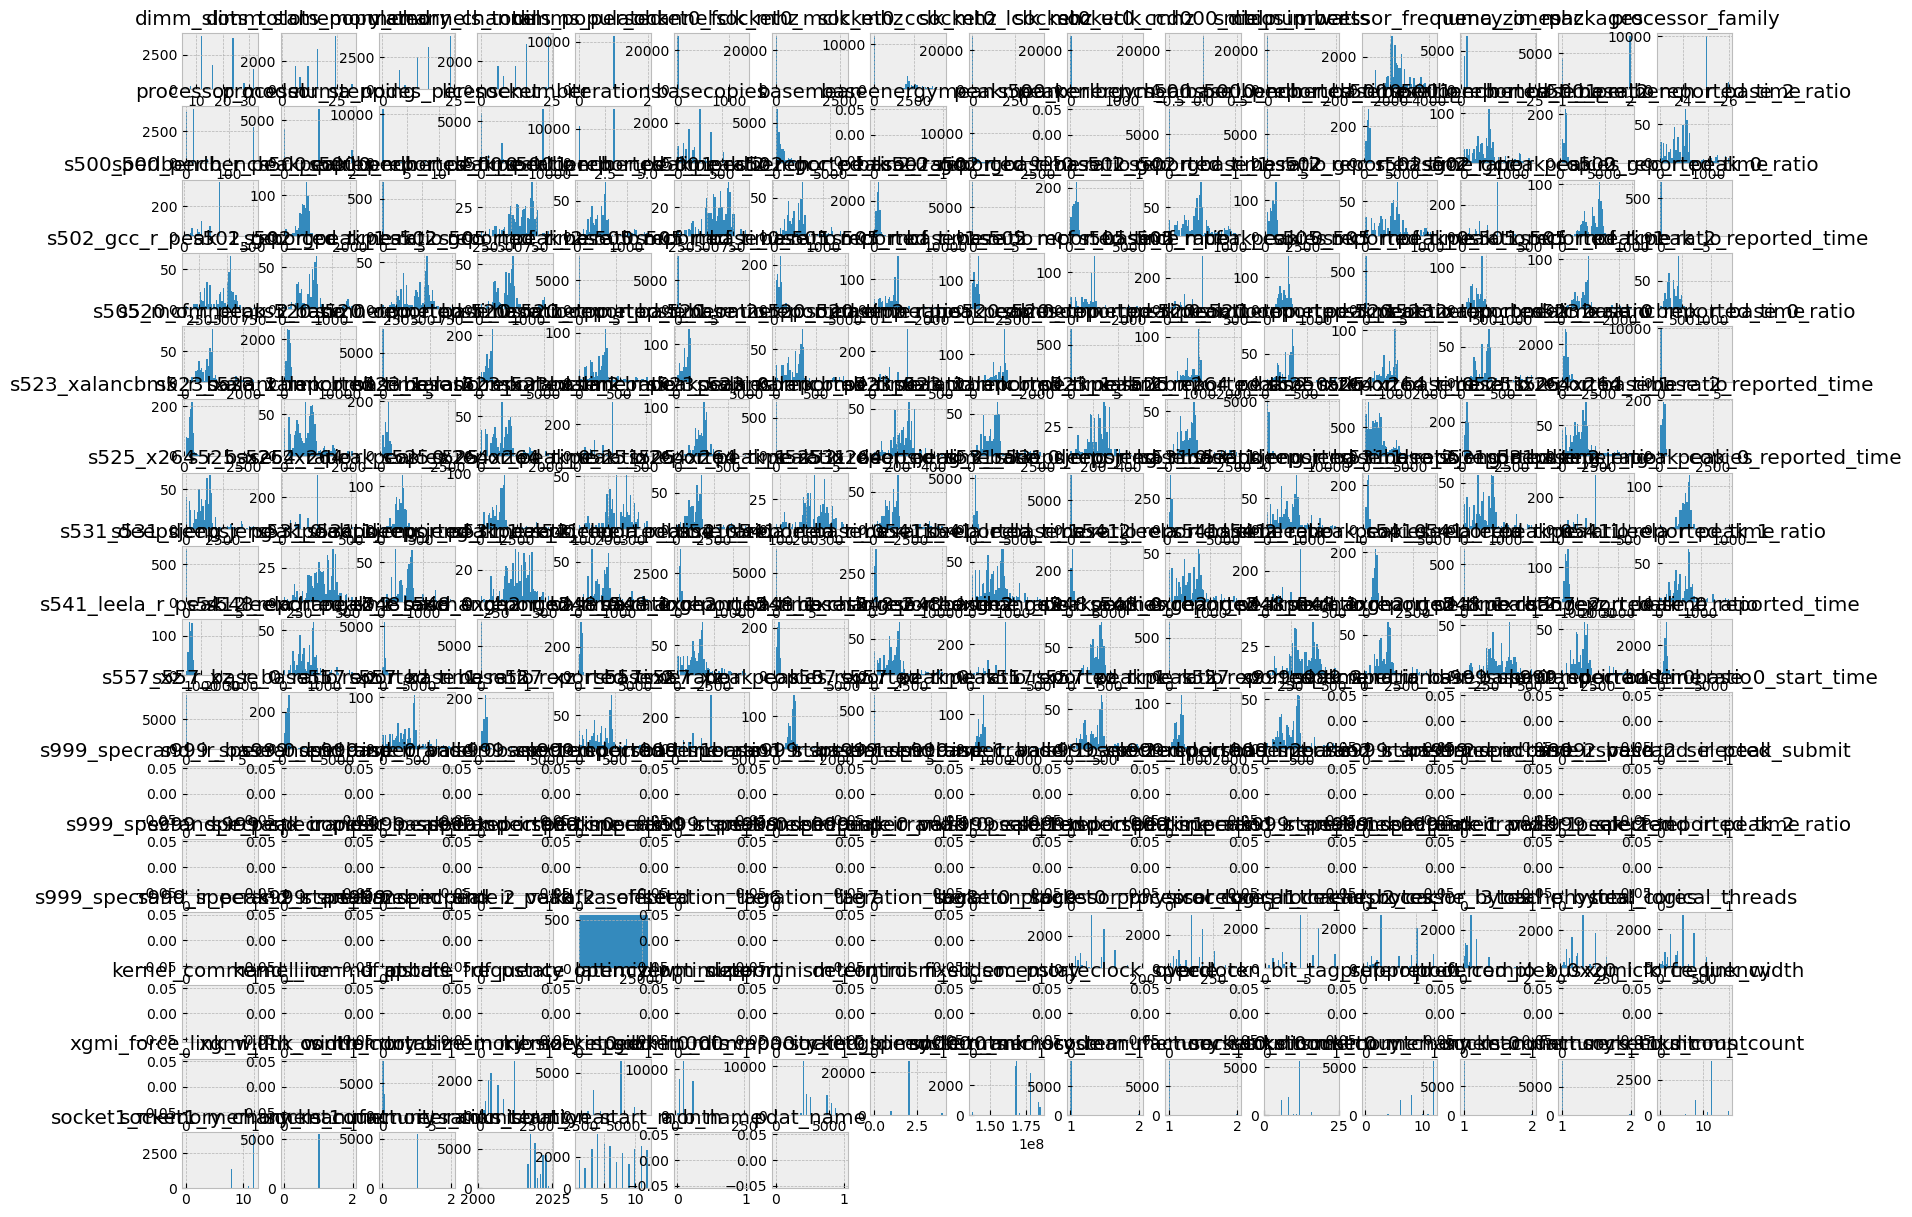

In [5]:
data.hist(bins=50, figsize=(20,15))

In [22]:
import pandas as pd
df=data
# Assuming 'feature_name' is the feature you want to use for categorization
category_counts = df['smbios_processor_version'].value_counts()

# 'category_counts' now contains the count of each unique value in 'feature_name'
# The most frequent category is the one with the highest count

most_frequent_category = category_counts.idxmax()
print(f"The most frequent category is: {most_frequent_category}")

# If you want to see the count for each category, you can print 'category_counts'
print("Category Counts:")
print(category_counts)

The most frequent category is: AMD EPYC 9D64 88-Core Processor
Category Counts:
smbios_processor_version
AMD EPYC 9D64 88-Core Processor             611
AMD EPYC 9B14 96-Core Processor             524
AMD EPYC 9654 96-Core Processor             510
AMD EPYC 7763 64-Core Processor             450
AMD EPYC 7B13 64-Core Processor             377
                                           ... 
AMD Eng Sample: 100-000000508-01_37/30_N      1
AMD Eng Sample: 100-000000425-02_37/23_N      1
Intel Xeon E-2224G                            1
AMD Eng Sample: 100-000000976-11              1
AMD Eng Sample: 100-000000308-02_30/18_N      1
Name: count, Length: 415, dtype: int64


In [23]:
import pandas as pd


df=data
# Assuming 'feature_name' is the feature you want to use for categorization
category_df = df.groupby('smbios_processor_version')

# Now, 'category_df' is a grouped DataFrame where each group corresponds to a unique value in 'feature_name'
l=[]
# You can access each category using a loop, for example:
for category_name, category_data in category_df:
    # 'category_name' is the unique value in 'feature_name'
    # 'category_data' is the DataFrame corresponding to this category
    print(f"Category: {category_name}")
    l.append(category_data)
    # Perform operations specific to each category here

# If you want to access a specific category by its name:
specific_category = category_df.get_group('AMD EPYC 9654 88-Core Processor')


Category: AMD EPYC
Category: AMD EPYC 7203 8-Core Processor
Category: AMD EPYC 7251
Category: AMD EPYC 7261
Category: AMD EPYC 7262
Category: AMD EPYC 7262 8-Core Processor
Category: AMD EPYC 7281
Category: AMD EPYC 7282 16-Core Processor
Category: AMD EPYC 72F3 8-Core Processor
Category: AMD EPYC 7301
Category: AMD EPYC 7302
Category: AMD EPYC 7302P
Category: AMD EPYC 7303 16-Core Processor
Category: AMD EPYC 7313 16-Core Processor
Category: AMD EPYC 7343 16-Core Processor
Category: AMD EPYC 7351
Category: AMD EPYC 7351P
Category: AMD EPYC 7352
Category: AMD EPYC 7352 24-Core Processor
Category: AMD EPYC 7371
Category: AMD EPYC 7373X 16-Core Processor
Category: AMD EPYC 73F3 16-Core Processor
Category: AMD EPYC 7401
Category: AMD EPYC 7401P
Category: AMD EPYC 7402
Category: AMD EPYC 7402 24-Core Processor
Category: AMD EPYC 7402P
Category: AMD EPYC 7413 24-Core Processor
Category: AMD EPYC 7443 24-Core Processor
Category: AMD EPYC 7451
Category: AMD EPYC 7452
Category: AMD EPYC 7452 3

KeyError: 'AMD EPYC 9654 88-Core Processor'

In [24]:
data = specific_category

In [25]:
data

test_series                        iteration_guid  \
701    SPECrate2017_int  0a1e504e-d0d0-4430-b89a-c1c7e03a4475   
755    SPECrate2017_int  177eefe8-8c32-4722-bb57-e01c334c6ca2   
846    SPECrate2017_int  2f5449aa-84a7-448c-a90a-3db1023e0eee   
951    SPECrate2017_int  4943a3bd-9618-4736-9196-1fdd4c437def   
1006   SPECrate2017_int  5901f285-91b9-4af5-a91d-c8bf5f6d99e9   
...                 ...                                   ...   
27198  SPECrate2017_int  4e866aca-c852-423f-aea4-e6e51a2c11ae   
27207  SPECrate2017_int  a8788140-029e-4b63-ace0-1e8a60b07c50   
27306  SPECrate2017_int  aff3adb9-8a42-48b9-9d09-f48e95537df6   
27385  SPECrate2017_int  4da1dba2-bd89-4424-8582-7d398c783f2d   
27412  SPECrate2017_int  0c121c9b-75fa-45fc-b815-7f9b12031ba6   

                  bmc_name bmc_version  dimm_slots_total  \
701       sp5-b120.amd.com        2.17              24.0   
755    quartz-b152.amd.com        2.17              12.0   
846       sp5-b116.amd.com        2.17              24.0   
951       sp5-b116.amd.com        2.17              24.0   
1006      sp5-b116.amd.com        2.17              24.0   
...                    ...         ...               ...   
27198   titanite-1668.sppo        2.17              28.0   
27207   titanite-1794.sppo        2.17              28.0   
27306   titanite-1794.sppo        2.17              28.0   
27385     quartz-b10e.sppo        2.17              24.0   
27412   titanite-1794.sppo        2.17              28.0   

       dimm_slots_populated  memory_channels_total  memory_channels_populated  \
701                    24.0                   24.0                       24.0   
755                    12.0                   12.0                       12.0   
846                    24.0                   24.0                       24.0   
951                    24.0                   24.0                       24.0   
1006                   24.0                   24.0                       24.0   
...                     ...                    ...                        ...   
27198                  24.0                   24.0                       24.0   
27207                  24.0                   24.0                       24.0   
27306                  24.0                   24.0                       24.0   
27385                  24.0                   24.0                       24.0   
27412                  24.0                   24.0                       24.0   

       dimms_per_channel socket0_name  ...               sut_name  \
701                  1.0           P0  ...  pmpd-quartz-b120-ms04   
755                  1.0           P0  ...             amd-QUARTZ   
846                  1.0           P0  ...  pmpd-quartz-b116-ms02   
951                  1.0           P0  ...  pmpd-quartz-b116-ms02   
1006                 1.0           P0  ...  pmpd-quartz-b116-ms02   
...                  ...          ...  ...                    ...   
27198                1.0           P0  ...           titanite-014   
27207                1.0           P0  ...     sppo-titanite-1794   
27306                1.0           P0  ...     sppo-titanite-1794   
27385                1.0           P0  ...            quartz-b10e   
27412                1.0           P0  ...     sppo-titanite-1794   

       submitter_name                     submitter_email  display  \
701              zack  zack@pmpd-quartz-b120-ms04.amd.com      NaN   
755            jiahao                   jiahao@amd-QUARTZ      NaN   
846              zack  zack@pmpd-quartz-b116-ms02.amd.com      NaN   
951              zack  zack@pmpd-quartz-b116-ms02.amd.com      NaN   
1006             zack  zack@pmpd-quartz-b116-ms02.amd.com      NaN   
...               ...                                 ...      ...   
27198      Shayantika     shayantika.bhattacharya@amd.com      NaN   
27207        v.mallya         v.mallya@sppo-titanite-1794      NaN   
27306        v.mallya         v.mallya@sppo-titanite-1794      NaN   
27385   

In [27]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
corr_matrix = data.corr(method='pearson',numeric_only=True).head(10)
corr_matrix

dimm_slots_total  dimm_slots_populated  \
dimm_slots_total                   1.000000              0.901665   
dimm_slots_populated               0.901665              1.000000   
memory_channels_total              0.923715              0.972995   
memory_channels_populated          0.901665              1.000000   
dimms_per_channel                       NaN                   NaN   
socket0_fclk_mhz                        NaN                   NaN   
socket0_mclk_mhz                        NaN                   NaN   
socket0_cclk_mhz                        NaN                   NaN   
socket0_lclk_mhz                        NaN                   NaN   
socket0_uclk_mhz                        NaN                   NaN   

                           memory_channels_total  memory_channels_populated  \
dimm_slots_total                        0.923715                   0.901665   
dimm_slots_populated                    0.972995                   1.000000   
memory_channels_total                   1.000000                   0.972995   
memory_channels_populated               0.972995                   1.000000   
dimms_per_channel                            NaN                        NaN   
socket0_fclk_mhz                             NaN                        NaN   
socket0_mclk_mhz                             NaN                        NaN   
socket0_cclk_mhz                             NaN                        NaN   
socket0_lclk_mhz                             NaN                        NaN   
socket0_uclk_mhz                             NaN                        NaN   

                           dimms_per_channel  socket0_fclk_mhz  \
dimm_slots_total                         NaN               NaN   
dimm_slots_populated                     NaN               NaN   
memory_channels_total                    NaN               NaN   
memory_channels_populated                NaN               NaN   
dimms_per_channel                        NaN               NaN   
socket0_fclk_mhz                         NaN               NaN   
socket0_mclk_mhz                         NaN               NaN   
socket0_cclk_mhz                         NaN               NaN   
socket0_lclk_mhz                         NaN               NaN   
socket0_uclk_mhz                         NaN               NaN   

                           socket0_mclk_mhz  socket0_cclk_mhz  \
dimm_slots_total                        NaN               NaN   
dimm_slots_populated                    NaN               NaN   
memory_channels_total                   NaN               NaN   
memory_channels_populated               NaN               NaN   
dimms_per_channel                       NaN               NaN   
socket0_fclk_mhz                        NaN               NaN   
socket0_mclk_mhz                        NaN               NaN   
socket0_cclk_mhz                        NaN               NaN   
socket0_lclk_mhz                        NaN               NaN   
socket0_uclk_mhz                        NaN               NaN   

                           socket0_lclk_mhz  socket0_uclk_mhz  ...  \
dimm_slots_total                        NaN               NaN  ...   
dimm_slots_populated                    NaN               NaN  ...   
memory_channels_total                   NaN               NaN  ...   
memory_channels_populated               NaN               NaN  ...   
dimms_per_channel                       NaN               NaN  ...   
socket0_fclk_mhz                        NaN               NaN  ...   
socket0_mclk_mhz                        NaN               NaN  ...   
socket0_cclk_mhz                        NaN               NaN  ...   
socket0_lclk_mhz                        NaN               NaN  ...   
socket0_uclk_mhz                        NaN               NaN  ...   

                           socket0_memory_manufacturers_count  \
dimm_slots_total                                     0.013216   
dimm_slots_populated                                -

In [28]:
df=data
# Assuming df is your DataFrame and non_numeric_columns is a list of columns
non_numeric_columns = df.select_dtypes(exclude=[np.number, 'boolean']).columns
non_numeric_columns

Index(['test_series', 'iteration_guid', 'bmc_name', 'bmc_version',
       'socket0_name', 'socket0_iod_name', 'socket0_iod_serial_number',
       'socket0_ccd000_serial_number', 'socket0_ccd000_name',
       'socket0_ccd000_short_name',
       ...
       'iteration_start_date', 'iteration_stop_date', 'sut_name',
       'submitter_name', 'submitter_email', 'display', 'internal_use',
       'external_use', 'ppog_version', 'last_updated'],
      dtype='object', length=359)

In [29]:
df_cleaned = df.drop(columns=non_numeric_columns)
# Check the resulting DataFrame
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701    ...                                 1.0                         1.0   
755    ...                                 1.0                         1.0   
846    ...                                 1.0                         1.0   
951    ...                                 1.0                         1.0   
1006   ...                                 2.0                         1.0   
...    ...                                 ...                         ...   
27198  ...                                 1.0                         1.0   
27207  ...                                 1.0                         1.0   
27306  ...                                 1.0                         1.0   
27385  ...                                 1.0                         1.0   
27412  ...                                 1.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
701                   12.0                           12.0   
755                    NaN                            NaN   
846                   12.0                           12.0   
951                   12.0                           12.0   
1006                  12.0                        

In [30]:
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701    ...                                 1.0                         1.0   
755    ...                                 1.0                         1.0   
846    ...                                 1.0                         1.0   
951    ...                                 1.0                         1.0   
1006   ...                                 2.0                         1.0   
...    ...                                 ...                         ...   
27198  ...                                 1.0                         1.0   
27207  ...                                 1.0                         1.0   
27306  ...                                 1.0                         1.0   
27385  ...                                 1.0                         1.0   
27412  ...                                 1.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
701                   12.0                           12.0   
755                    NaN                            NaN   
846                   12.0                           12.0   
951                   12.0                           12.0   
1006                  12.0                        

In [31]:
numeric_cols = data.select_dtypes(include=['number','boolean']).columns
numeric_cols

Index(['dimm_slots_total', 'dimm_slots_populated', 'memory_channels_total',
       'memory_channels_populated', 'dimms_per_channel', 'socket0_fclk_mhz',
       'socket0_mclk_mhz', 'socket0_cclk_mhz', 'socket0_lclk_mhz',
       'socket0_uclk_mhz',
       ...
       'socket0_memory_manufacturers_count', 'socket0_memory_ranks_count',
       'socket1_dimms_count', 'socket1_memory_channels_count',
       'socket1_memory_manufacturers_count', 'socket1_memory_ranks_count',
       'iteration_start_year', 'iteration_start_month', 'a_b_name',
       'pdat_name'],
      dtype='object', length=247)

In [32]:
import pandas as pd

# Assuming df is your DataFrame with mixed data types
threshold_missing = 0.5  # Adjust the threshold based on your criteria

# Separate numeric and non-numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Drop columns with a high percentage of missing values for numeric columns
df_numeric_cleaned = df_cleaned[numeric_cols].dropna(axis=1, thresh=int((1 - threshold_missing) * len(df_cleaned[numeric_cols])))

# Impute missing values for remaining numeric columns
df_numeric_cleaned = df_numeric_cleaned.fillna(df_numeric_cleaned.mean())

# Keep non-numeric columns
df_non_numeric = df_cleaned[non_numeric_cols]

# Concatenate the cleaned numeric and non-numeric DataFrames
df_cleaned = pd.concat([df_numeric_cleaned, df_non_numeric], axis=1)
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
701    ...                 12.0                           12.0   
755    ...                 12.0                           12.0   
846    ...                 12.0                           12.0   
951    ...                 12.0                           12.0   
1006   ...                 12.0                           12.0   
...    ...                  ...                            ...   
27198  ...                 12.0                           12.0   
27207  ...                 12.0                           12.0   
27306  ...                 12.0                           12.0   
27385  ...                 12.0                           12.0   
27412  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701                                   1.0                         1.0   
755                                   1.0                         1.0   
846                                   1.0                         1.0   
951                                   1.0                         1.0   
1006                                  2.0                         1.0   
...                                   ...                    

# Data Pre processing

In [33]:
import pandas as pd

# Assuming df_cleaned is your DataFrame with mixed data types
threshold_correlation = 0.8  # Adjust the correlation threshold

# Separate numeric and non-numeric columns
#numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
#on_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix_numeric = df_cleaned.corr()
correlation_matrix_numeric
# Identify highly correlated columns
highly_correlated = set()
for i in range(len(correlation_matrix_numeric.columns)):
    for j in range(i):
        if abs(correlation_matrix_numeric.iloc[i, j]) > threshold_correlation:
            colname = correlation_matrix_numeric.columns[i]
            highly_correlated.add(colname)
highly_correlated
# # Drop highly correlated columns for numeric columns
# df_cleaned_numeric = df_cleaned[numeric_cols].drop(columns=highly_correlated)

# # # Concatenate cleaned numeric and non-numeric DataFrames
# df_cleaned = pd.concat([df_cleaned_numeric, df_cleaned[non_numeric_cols]], axis=1)
# df_cleaned

{'basemean',
 'dimm_slots_populated',
 'memory_channels_populated',
 'memory_channels_total',
 'numa_nodes_per_socket',
 'os_memory_size_in_kib',
 'packages',
 'peakmean',
 'processor_l1_cache_bytes',
 'processor_l2_cache_bytes',
 's500_perlbench_r_base_0_ratio',
 's502_gcc_r_base_0_ratio',
 's502_gcc_r_base_0_reported_time',
 's505_mcf_r_base_0_ratio',
 's520_omnetpp_r_base_0_ratio',
 's520_omnetpp_r_base_0_reported_time',
 's523_xalancbmk_r_base_0_ratio',
 's523_xalancbmk_r_base_0_reported_time',
 's525_x264_r_base_0_ratio',
 's525_x264_r_base_0_reported_time',
 's531_deepsjeng_r_base_0_ratio',
 's531_deepsjeng_r_base_0_reported_time',
 's541_leela_r_base_0_ratio',
 's541_leela_r_base_0_reported_time',
 's548_exchange2_r_base_0_ratio',
 's548_exchange2_r_base_0_reported_time',
 's557_xz_r_base_0_ratio',
 's557_xz_r_base_0_reported_time',
 'socket0_dimm000_rank',
 'socket0_memory_manufacturers_count',
 'socket0_microcode',
 'socket1_memory_channels_count',
 'socket1_memory_manufacture

In [34]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
regression_data = df_cleaned
corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

dimm_slots_total  dimm_slots_populated  \
dimm_slots_total                            1.000000              0.901665   
dimm_slots_populated                        0.901665              1.000000   
memory_channels_total                       0.923715              0.972995   
memory_channels_populated                   0.901665              1.000000   
dimms_per_channel                                NaN                   NaN   
...                                              ...                   ...   
socket1_memory_channels_count               0.012545              0.230828   
socket1_memory_manufacturers_count         -0.016652             -0.126421   
socket1_memory_ranks_count                       NaN                   NaN   
iteration_start_year                        0.140432              0.082602   
iteration_start_month                      -0.287324             -0.293083   

                                    memory_channels_total  \
dimm_slots_total                             9.237147e-01   
dimm_slots_populated                         9.729946e-01   
memory_channels_total                        1.000000e+00   
memory_channels_populated                    9.729946e-01   
dimms_per_channel                                     NaN   
...                                                   ...   
socket1_memory_channels_count               -2.785115e-16   
socket1_memory_manufacturers_count           2.621037e-17   
socket1_memory_ranks_count                            NaN   
iteration_start_year                         7.234882e-02   
iteration_start_month                       -3.011461e-01   

                                    memory_channels_populated  \
dimm_slots_total                                     0.901665   
dimm_slots_populated                                 1.000000   
memory_channels_total                                0.972995   
memory_channels_populated                            1.000000   
dimms_per_channel                                         NaN   
...                                                       ...   
socket1_memory_channels_count                        0.230828   
socket1_memory_manufacturers_count                  -0.126421   
socket1_memory_ranks_count                                NaN   
iteration_start_year                                 0.082602   
iteration_start_month                               -0.293083   

                                    dimms_per_channel  socket0_fclk_mhz  \
dimm_slots_total                                  NaN               NaN   
dimm_slots_populated                              NaN               NaN   
memory_channels_total                             NaN               NaN   
memory_channels_populated                         NaN               NaN   
dimms_per_channel                                 NaN               NaN   
...                                               ...               ...   
socket1_memory_channels_count                     NaN               NaN   
socket1_memory_manufacturers_count                NaN               NaN   
socket1_memory_ranks_count                        NaN               NaN   
iteration_start_year                              NaN               NaN   
iteration_start_month                             NaN               NaN   

                                    socket0_mclk_mhz  socket0_cclk_mhz  \
dimm_slots_total                                 NaN               NaN   
dimm_slots_populated                             NaN               NaN   
memory_channels_total                            NaN               NaN   
memory_channels_populated                        NaN               NaN   
dimms_per_channel                                NaN               NaN   
...                                              ...               ...   
socket1_memory_channels_count                    NaN               NaN   
socket1_memory_manufacturers_count               NaN               NaN   
socket1_memory_ran

In [35]:
import sweetviz as sv

report = sv.analyze(df_cleaned)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
 df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
701    ...                 12.0                           12.0   
755    ...                 12.0                           12.0   
846    ...                 12.0                           12.0   
951    ...                 12.0                           12.0   
1006   ...                 12.0                           12.0   
...    ...                  ...                            ...   
27198  ...                 12.0                           12.0   
27207  ...                 12.0                           12.0   
27306  ...                 12.0                           12.0   
27385  ...                 12.0                           12.0   
27412  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701                                   1.0                         1.0   
755                                   1.0                         1.0   
846                                   1.0                         1.0   
951                                   1.0                         1.0   
1006                                  2.0                         1.0   
...                                   ...                    

In [37]:
data = df_cleaned

In [38]:
data

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
701    ...                 12.0                           12.0   
755    ...                 12.0                           12.0   
846    ...                 12.0                           12.0   
951    ...                 12.0                           12.0   
1006   ...                 12.0                           12.0   
...    ...                  ...                            ...   
27198  ...                 12.0                           12.0   
27207  ...                 12.0                           12.0   
27306  ...                 12.0                           12.0   
27385  ...                 12.0                           12.0   
27412  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701                                   1.0                         1.0   
755                                   1.0                         1.0   
846                                   1.0                         1.0   
951                                   1.0                         1.0   
1006                                  2.0                         1.0   
...                                   ...                    

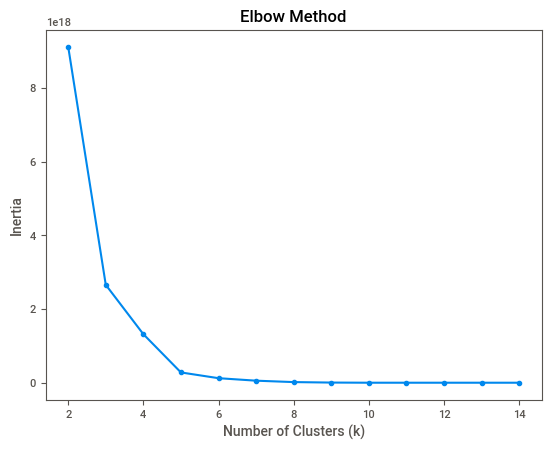

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming scaled_data is your standardized data
inertias = []
possible_k_values = range(2, 15)  # You can adjust the range based on your data

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming 'data' is your dataset with columns for min Gflops, max Gflops, and different tests
test_data = data
# Extract relevant columns
#test_columns = data.columns[2:]  # Assuming columns 0 and 1 are for min and max Gflops
#X = data[['basemean', 'peakmean'] + test_columns]
columns_to_exclude = ['basemean', 'peakmean']
filtered_data = test_data.drop(columns=columns_to_exclude)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# # Choose the number of clusters (you may need to adjust this based on your data)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# # Visualize clusters in 3D (assuming you have at least three test columns)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# for cluster in range(n_clusters):
#     cluster_data = data[data['cluster'] == cluster]
#     ax.scatter(cluster_data['basemean'], cluster_data['peakmean'], cluster_data[filtered_data[0]],
#                label=f'Cluster {cluster + 1}')

# ax.set_xlabel('Min Gflops')
# ax.set_ylabel('Max Gflops')
# ax.set_zlabel(test_columns[0])
# ax.set_title('Clustering Visualization')
# ax.legend()

# plt.show()
#filtered_data
data

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_channels_count  socket0_memory_manufacturers_count  \
701    ...                           12.0                                 1.0   
755    ...                           12.0                                 1.0   
846    ...                           12.0                                 1.0   
951    ...                           12.0                                 1.0   
1006   ...                           12.0                                 2.0   
...    ...                            ...                                 ...   
27198  ...                           12.0                                 1.0   
27207  ...                           12.0                                 1.0   
27306  ...                           12.0                                 1.0   
27385  ...                           12.0                                 1.0   
27412  ...                           12.0                                 1.0   

       socket0_memory_ranks_count  socket1_dimms_count  \
701                           1.0            12.000000   
755                           1.0            11.931034   
846                           1.0            12.000000   
951                           1.0            12.000000   
1006                         

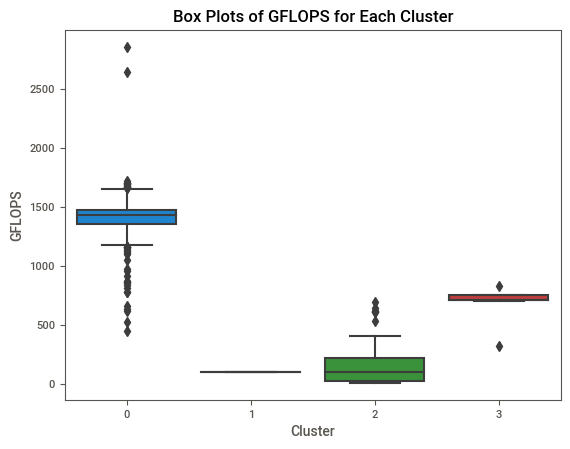

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='cluster', y='basemean', data=data)
plt.xlabel('Cluster')
plt.ylabel('GFLOPS')
plt.title('Box Plots of GFLOPS for Each Cluster')
plt.show()

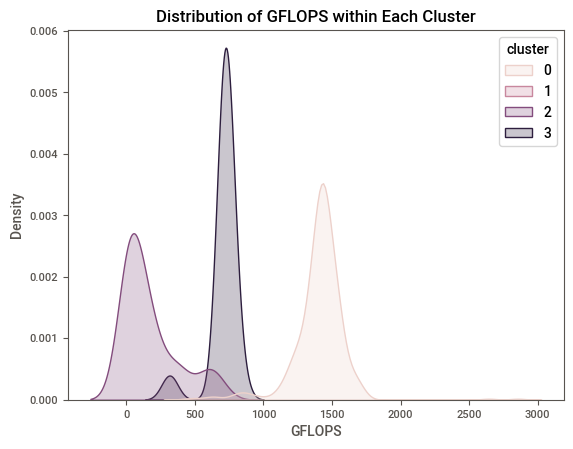

In [42]:
sns.kdeplot(x='basemean', hue='cluster', data=data, fill=True, common_norm=False)
plt.xlabel('GFLOPS')
plt.title('Distribution of GFLOPS within Each Cluster')
plt.show()

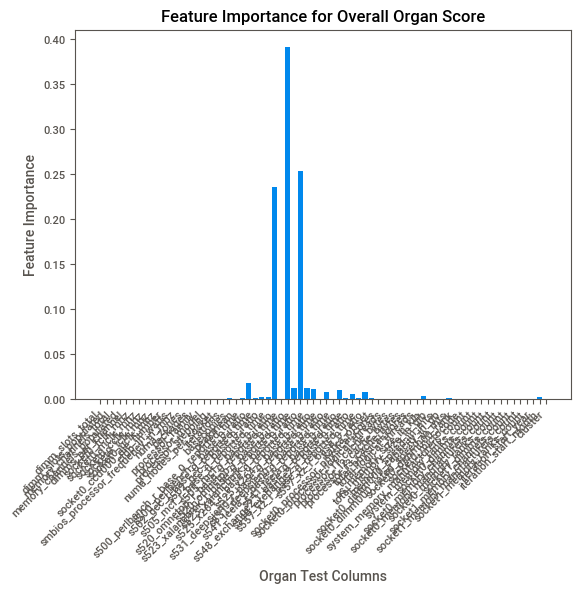

In [43]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
df=data
# Assuming df is your DataFrame
X = df.drop('basemean', axis=1)  # Features (organ test columns)
y = df['basemean']  # Target variable (overall organ score)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Organ Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Overall Organ Score')
plt.xticks(rotation=45, ha='right')
plt.show()


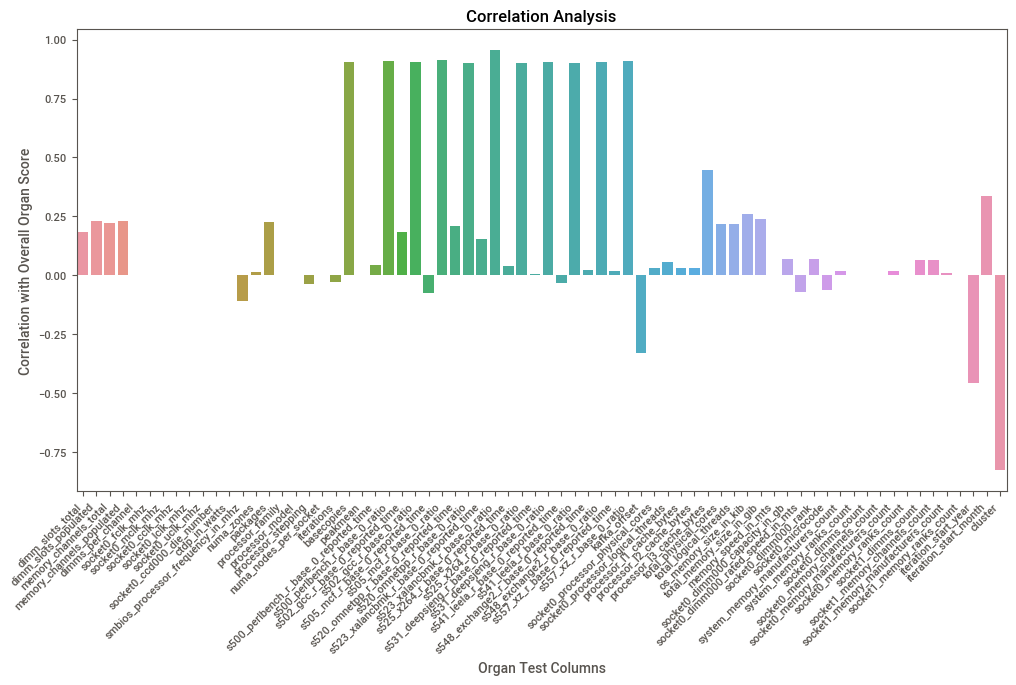

In [44]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix['basemean'].drop('basemean')

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xlabel('Organ Test Columns')
plt.ylabel('Correlation with Overall Organ Score')
plt.title('Correlation Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()


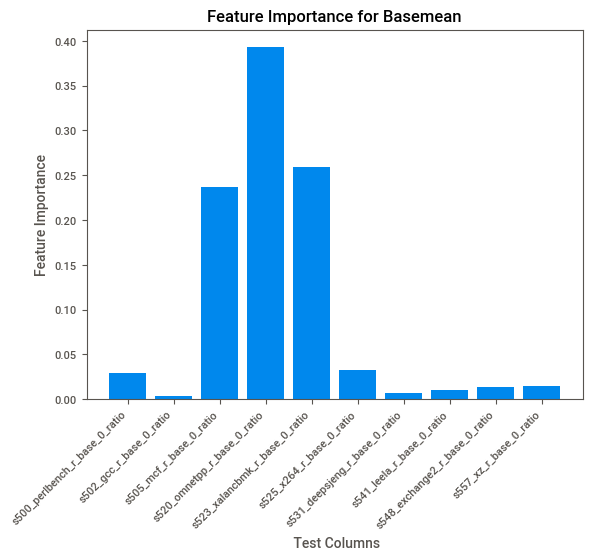

In [45]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
df=data
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')
# Assuming df is your DataFrame
X = selected_columns.drop('basemean', axis=1)  # Features (organ test columns)
y = selected_columns['basemean']   # Target variable (overall organ score)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel(' Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Basemean')
plt.xticks(rotation=45, ha='right')
plt.show()


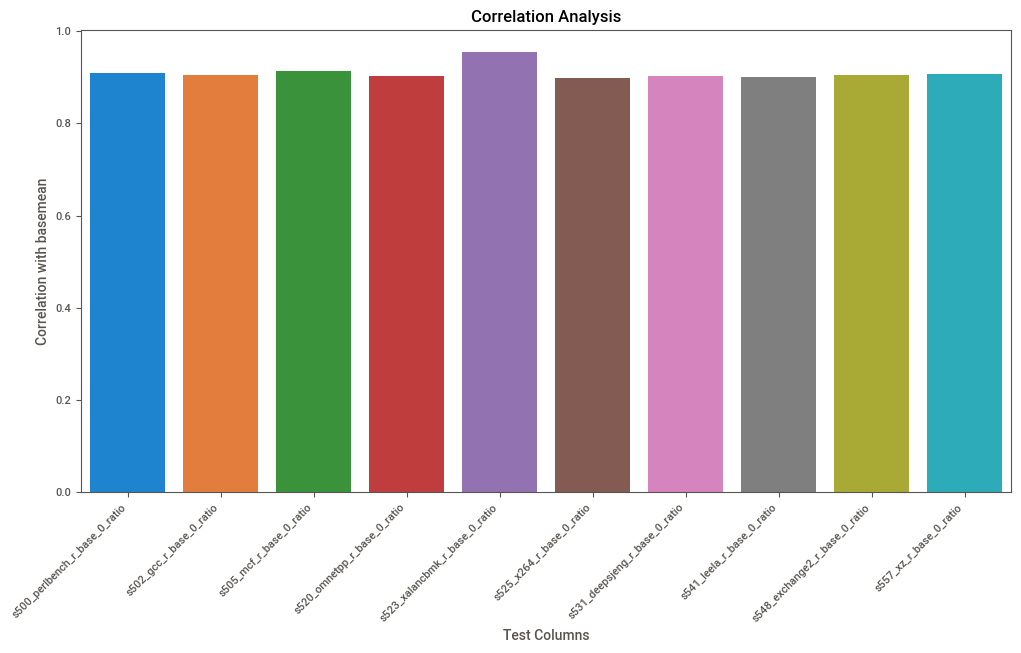

In [46]:
import seaborn as sns
# Assuming df is your DataFrame
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')

# Display the selected columns
#print(selected_columns)

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix['basemean'].drop('basemean')

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xlabel('Test Columns')
plt.ylabel('Correlation with basemean')
plt.title('Correlation Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')
# Assuming you have a dataset 'X' and target variable 'y'
# Replace this with your actual dataset and target variable
X = selected_columns.drop('basemean', axis=1)  # Features (organ test columns)
y = selected_columns['basemean'] 
X

rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

y_pred = rf_model.predict(X)


In [48]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
regression_data = selected_columns
corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

basemean  s500_perlbench_r_base_0_ratio  \
basemean                       1.000000                       0.908882   
s500_perlbench_r_base_0_ratio  0.908882                       1.000000   
s502_gcc_r_base_0_ratio        0.903785                       0.986148   
s505_mcf_r_base_0_ratio        0.912845                       0.966796   
s520_omnetpp_r_base_0_ratio    0.901615                       0.957069   
s523_xalancbmk_r_base_0_ratio  0.953920                       0.940059   
s525_x264_r_base_0_ratio       0.899070                       0.958600   
s531_deepsjeng_r_base_0_ratio  0.903412                       0.975555   
s541_leela_r_base_0_ratio      0.900420                       0.968526   
s548_exchange2_r_base_0_ratio  0.904186                       0.978259   
s557_xz_r_base_0_ratio         0.907201                       0.993404   

                               s502_gcc_r_base_0_ratio  \
basemean                                      0.903785   
s500_perlbench_r_base_0_ratio                 0.986148   
s502_gcc_r_base_0_ratio                       1.000000   
s505_mcf_r_base_0_ratio                       0.966704   
s520_omnetpp_r_base_0_ratio                   0.962115   
s523_xalancbmk_r_base_0_ratio                 0.941378   
s525_x264_r_base_0_ratio                      0.947344   
s531_deepsjeng_r_base_0_ratio                 0.958129   
s541_leela_r_base_0_ratio                     0.951427   
s548_exchange2_r_base_0_ratio                 0.964356   
s557_xz_r_base_0_ratio                        0.982818   

                               s505_mcf_r_base_0_ratio  \
basemean                                      0.912845   
s500_perlbench_r_base_0_ratio                 0.966796   
s502_gcc_r_base_0_ratio                       0.966704   
s505_mcf_r_base_0_ratio                       1.000000   
s520_omnetpp_r_base_0_ratio                   0.976794   
s523_xalancbmk_r_base_0_ratio                 0.947295   
s525_x264_r_base_0_ratio                      0.958879   
s531_deepsjeng_r_base_0_ratio                 0.954213   
s541_leela_r_base_0_ratio                     0.950630   
s548_exchange2_r_base_0_ratio                 0.955572   
s557_xz_r_base_0_ratio                        0.970493   

                               s520_omnetpp_r_base_0_ratio  \
basemean                                          0.901615   
s500_perlbench_r_base_0_ratio                     0.957069   
s502_gcc_r_base_0_ratio                           0.962115   
s505_mcf_r_base_0_ratio                           0.976794   
s520_omnetpp_r_base_0_ratio                       1.000000   
s523_xalancbmk_r_base_0_ratio                     0.949521   
s525_x264_r_base_0_ratio                          0.950162   
s531_deepsjeng_r_base_0_ratio                     0.941631   
s541_leela_r_base_0_ratio                         0.937040   
s548_exchange2_r_base_0_ratio                     0.943483   
s557_xz_r_base_0_ratio                            0.963652   

                               s523_xalancbmk_r_base_0_ratio  \
basemean                                            0.953920   
s500_perlbench_r_base_0_ratio                       0.940059   
s502_gcc_r_base_0_ratio                             0.941378   
s505_mcf_r_base_0_ratio                             0.947295   
s520_omnetpp_r_base_0_ratio                         0.949521   
s523_xalancbmk_r_base_0_ratio                       1.000000   
s525_x264_r_base_0_ratio                            0.935694   
s531_deepsjeng_r_base_0_ratio                       0.927070   
s541_leela_r_base_0_ratio                           0.921119   
s548_exchange2_r_base_0_ratio                       0.932679   
s557_xz_r_base_0_ratio                              0.937805   

                               s525_x264_r_base_0_ratio  \
basemean                                       0.899070   
s500_perlbench_r_base_0_ratio                  0.958600   
s502_gcc_r_base_0_ratio                        0.947344  

In [49]:
import pandas as pd

# Assuming df is your DataFrame containing the features
# Replace 'features' with the actual columns in your dataset
features = selected_columns

# Compute the correlation matrix
correlation_matrix = features.corr()

# Set a threshold for correlation strength
correlation_threshold = 0.8  # You can adjust this threshold as needed

# Find highly correlated pairs
highly_correlated_pairs = []
weakly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)
        else:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            weakly_correlated_pairs.append(pair)

# Print highly correlated pairs
print("Highly Correlated Pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

# Print weakly correlated pairs
print("\nWeakly Correlated Pairs:")
for pair in weakly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")


Highly Correlated Pairs:
s500_perlbench_r_base_0_ratio - basemean : 0.9088816322170361
s502_gcc_r_base_0_ratio - basemean : 0.9037847970501106
s502_gcc_r_base_0_ratio - s500_perlbench_r_base_0_ratio : 0.9861484865527947
s505_mcf_r_base_0_ratio - basemean : 0.9128451999659726
s505_mcf_r_base_0_ratio - s500_perlbench_r_base_0_ratio : 0.9667955829347935
s505_mcf_r_base_0_ratio - s502_gcc_r_base_0_ratio : 0.9667037730967145
s520_omnetpp_r_base_0_ratio - basemean : 0.9016147522414997
s520_omnetpp_r_base_0_ratio - s500_perlbench_r_base_0_ratio : 0.957069101444644
s520_omnetpp_r_base_0_ratio - s502_gcc_r_base_0_ratio : 0.9621154474781712
s520_omnetpp_r_base_0_ratio - s505_mcf_r_base_0_ratio : 0.97679352291458
s523_xalancbmk_r_base_0_ratio - basemean : 0.9539202278596456
s523_xalancbmk_r_base_0_ratio - s500_perlbench_r_base_0_ratio : 0.9400585558638703
s523_xalancbmk_r_base_0_ratio - s502_gcc_r_base_0_ratio : 0.9413780595949662
s523_xalancbmk_r_base_0_ratio - s505_mcf_r_base_0_ratio : 0.947294

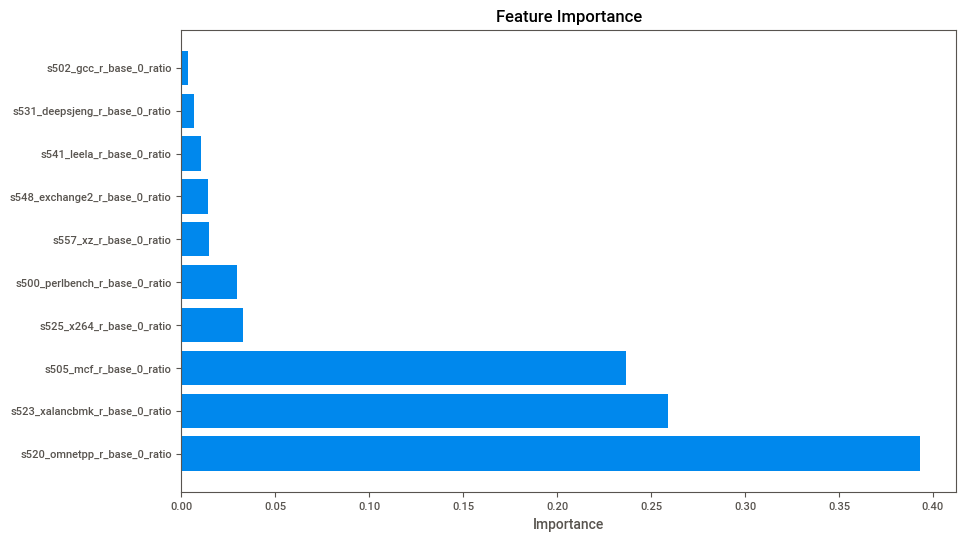

In [50]:

# Get feature importances
feature_importances = rf_model.feature_importances_

# Visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [51]:

# Feature importance threshold
threshold = 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

print(f'Features with Importance > {threshold}: {important_features}')


Features with Importance > 0.02: ['s520_omnetpp_r_base_0_ratio', 's523_xalancbmk_r_base_0_ratio', 's505_mcf_r_base_0_ratio', 's525_x264_r_base_0_ratio', 's500_perlbench_r_base_0_ratio']


In [52]:

# Select top N important features
top_n = 5
selected_features = feature_importance_df['Feature'][:top_n].tolist()

print(f'Top {top_n} Important Features: {selected_features}')

Top 5 Important Features: ['s520_omnetpp_r_base_0_ratio', 's523_xalancbmk_r_base_0_ratio', 's505_mcf_r_base_0_ratio', 's525_x264_r_base_0_ratio', 's500_perlbench_r_base_0_ratio']


In [53]:
# Feature importance vs. correlation
correlation_matrix = X.corr()

# Iterate through features and their importance
for feature in selected_features:
    correlation_with_target = correlation_matrix[feature]  # Replace 'target' with your actual target variable
    print(f'Correlation between {feature} and target: {correlation_with_target}')


Correlation between s520_omnetpp_r_base_0_ratio and target: s500_perlbench_r_base_0_ratio    0.957069
s502_gcc_r_base_0_ratio          0.962115
s505_mcf_r_base_0_ratio          0.976794
s520_omnetpp_r_base_0_ratio      1.000000
s523_xalancbmk_r_base_0_ratio    0.949521
s525_x264_r_base_0_ratio         0.950162
s531_deepsjeng_r_base_0_ratio    0.941631
s541_leela_r_base_0_ratio        0.937040
s548_exchange2_r_base_0_ratio    0.943483
s557_xz_r_base_0_ratio           0.963652
Name: s520_omnetpp_r_base_0_ratio, dtype: float64
Correlation between s523_xalancbmk_r_base_0_ratio and target: s500_perlbench_r_base_0_ratio    0.940059
s502_gcc_r_base_0_ratio          0.941378
s505_mcf_r_base_0_ratio          0.947295
s520_omnetpp_r_base_0_ratio      0.949521
s523_xalancbmk_r_base_0_ratio    1.000000
s525_x264_r_base_0_ratio         0.935694
s531_deepsjeng_r_base_0_ratio    0.927070
s541_leela_r_base_0_ratio        0.921119
s548_exchange2_r_base_0_ratio    0.932679
s557_xz_r_base_0_ratio        

In [54]:
# Feature engineering (example: multiplying two important features)
X['new_feature_1'] = X['s526_blender_r_base_0_ratio'] * X['s507_cactubssn_r_base_0_ratio']

KeyError: 's526_blender_r_base_0_ratio'

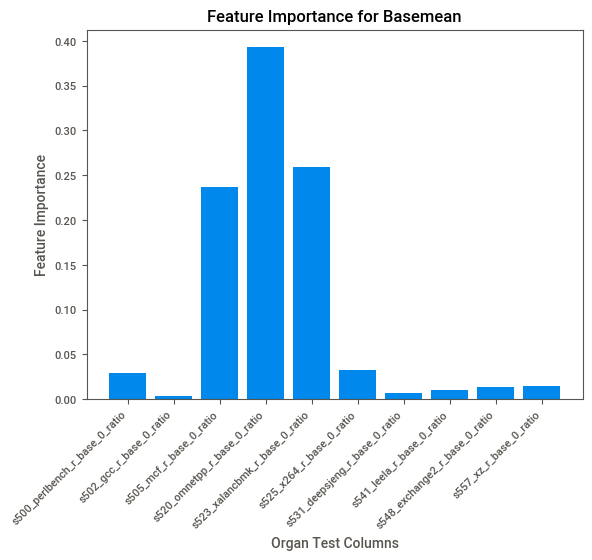

In [55]:
y = selected_columns['basemean'] 
X

rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Organ Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Basemean')
plt.xticks(rotation=45, ha='right')
plt.show()


Text(0.5, 1.0, 'Distribution of Overall Scores')

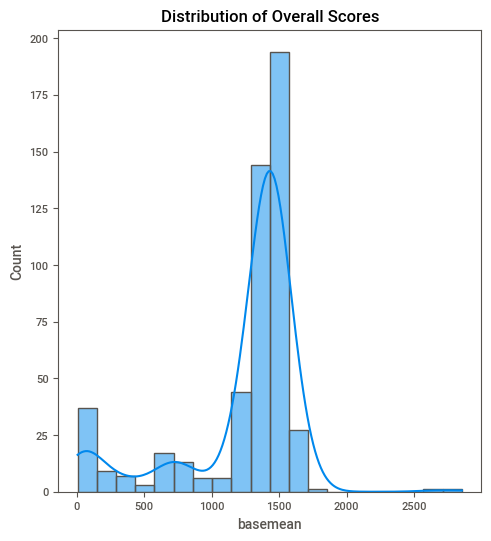

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'overall_score' and 'max_overall_score' are your column names
overall_score_column = 'basemean'
max_overall_score_column = 'peakmean'

# Data Exploration
# Histogram and Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[overall_score_column], bins=20, kde=True)
plt.title('Distribution of Overall Scores')




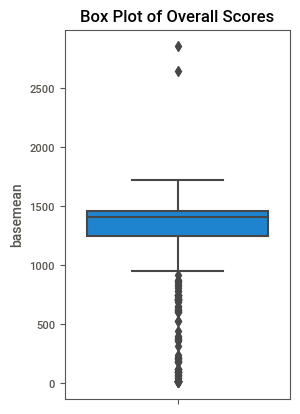

          basemean     peakmean
count   510.000000   510.000000
mean   1239.737533    28.024578
std     448.905772   192.980831
min       5.344141    -1.000000
25%    1244.837783    -1.000000
50%    1411.868624    -1.000000
75%    1458.045839    -1.000000
max    2856.121344  1544.514050


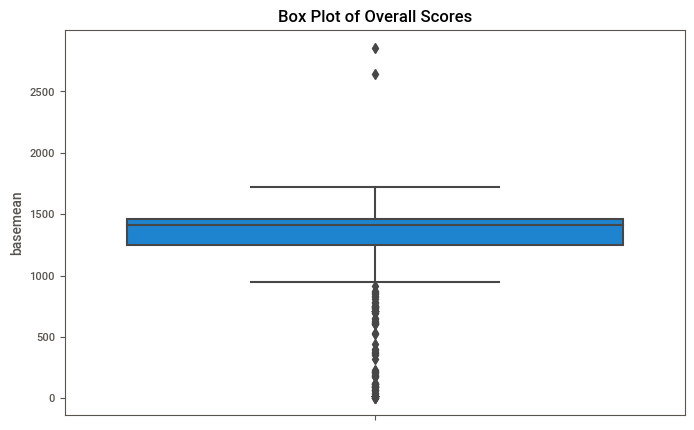

In [57]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df[overall_score_column])
plt.title('Box Plot of Overall Scores')
plt.show()

# Summary Statistics
summary_stats = df[[overall_score_column, max_overall_score_column]].describe()
print(summary_stats)

# Identify Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df[overall_score_column])
plt.title('Box Plot of Overall Scores')
plt.show()

In [58]:
# Correlation Analysis
correlation_matrix = df[[overall_score_column, max_overall_score_column]].corr()
print(correlation_matrix)

# Feature Importance (using hypothetical machine learning model)
# Assuming X contains your input features and y is the overall score
from sklearn.ensemble import RandomForestRegressor

X = df.drop([overall_score_column, max_overall_score_column], axis=1)  # Adjust this based on your actual DataFrame
y = df[overall_score_column]

model = RandomForestRegressor()
model.fit(X, y)

# Display Feature Importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(f'Features with Importance > {threshold}: {important_features}')

          basemean  peakmean
basemean   1.00000   0.00365
peakmean   0.00365   1.00000
Features with Importance > 0.02: ['s520_omnetpp_r_base_0_ratio', 's505_mcf_r_base_0_ratio', 's523_xalancbmk_r_base_0_ratio']


In [59]:
from sklearn.cluster import KMeans

# Assuming X contains your input features
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters based on your data
df['cluster'] = kmeans.fit_predict(X)


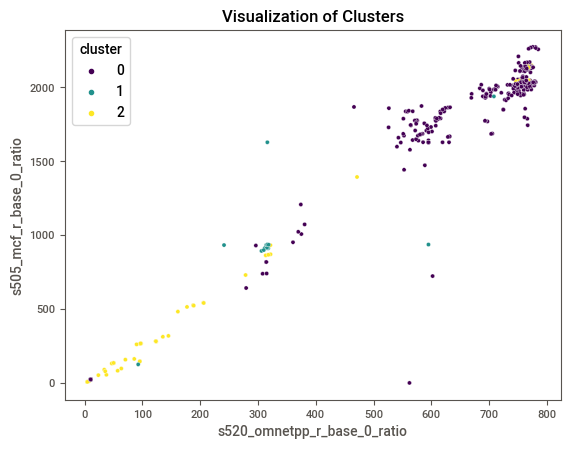

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='s520_omnetpp_r_base_0_ratio', y='s505_mcf_r_base_0_ratio', hue='cluster', data=df, palette='viridis')
plt.title('Visualization of Clusters')
plt.show()


In [62]:
from scipy.stats import zscore

df['z_score'] = zscore(df[overall_score_column])
outliers = df[df['z_score'].abs() > 1]
outliers

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
755                12.0                  12.0                   12.0   
1031               24.0                  24.0                   24.0   
1085               24.0                  24.0                   24.0   
1098               24.0                  24.0                   24.0   
1253               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
26656              24.0                  24.0                   24.0   
26682              28.0                  24.0                   24.0   
26695              28.0                  24.0                   24.0   
27082              28.0                  24.0                   24.0   
27145              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
755                         12.0                1.0              -1.0   
1031                        24.0                1.0              -1.0   
1085                        24.0                1.0              -1.0   
1098                        24.0                1.0              -1.0   
1253                        24.0                1.0              -1.0   
...                          ...                ...               ...   
26656                       24.0                1.0              -1.0   
26682                       24.0                1.0              -1.0   
26695                       24.0                1.0              -1.0   
27082                       24.0                1.0              -1.0   
27145                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
755                -1.0              -1.0              -1.0              -1.0   
1031               -1.0              -1.0              -1.0              -1.0   
1085               -1.0              -1.0              -1.0              -1.0   
1098               -1.0              -1.0              -1.0              -1.0   
1253               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
26656              -1.0              -1.0              -1.0              -1.0   
26682              -1.0              -1.0              -1.0              -1.0   
26695              -1.0              -1.0              -1.0              -1.0   
27082              -1.0              -1.0              -1.0              -1.0   
27145              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
755    ...                                 1.0                         1.0   
1031   ...                                 1.0                         1.0   
1085   ...                                 1.0                         1.0   
1098   ...                                 1.0                         1.0   
1253   ...                                 1.0                         1.0   
...    ...                                 ...                         ...   
26656  ...                                 1.0                         1.0   
26682  ...                                 1.0                         1.0   
26695  ...                                 1.0                         1.0   
27082  ...                                 1.0                         1.0   
27145  ...                                 1.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
755              11.931034                      11.931034   
1031             12.000000                      12.000000   
1085             12.000000                      12.000000   
1098             12.000000                      12.000000   
1253             12.000000                      12

In [63]:
df[overall_score_column]

701      1371.571584
755       745.285858
846      1321.522944
951      1343.212416
1006     1454.885760
            ...     
27198    1446.512297
27207    1216.369355
27306    1216.369355
27385    1446.512297
27412    1221.975410
Name: basemean, Length: 510, dtype: float64

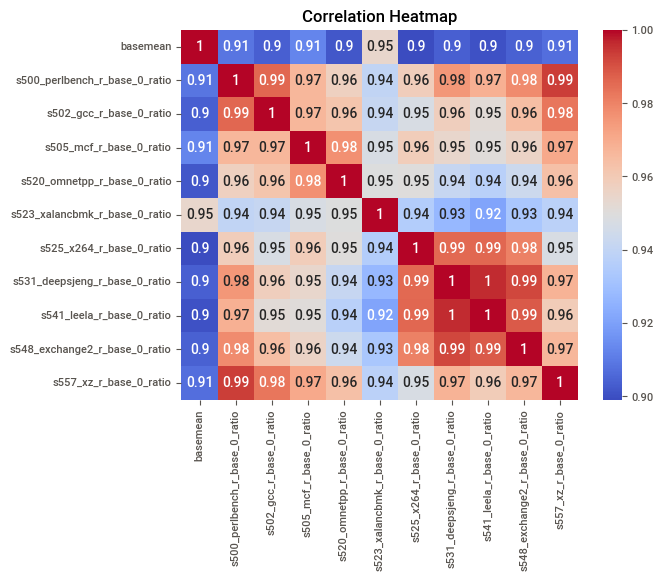

In [64]:
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Observations 
1. Linear relationship between the test feature are very high
2. Non linear relationship gives good insights - Top 5 Important Features: ['s526_blender_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's544_nab_r_base_0_ratio']
and did some Feature engineering for testing and confirm these testing feature are importance.


In [65]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,
 test_size=0.2,
 random_state=42,
 shuffle=True)
train_set

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16556              24.0                  24.0                   24.0   
19119              24.0                  24.0                   24.0   
26669              28.0                  24.0                   24.0   
7977               24.0                  24.0                   24.0   
26711              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
6341               24.0                  24.0                   24.0   
14880              24.0                  24.0                   24.0   
19118              24.0                  24.0                   24.0   
24362              24.0                  24.0                   24.0   
6232               24.0                  19.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16556                       24.0                1.0              -1.0   
19119                       24.0                1.0              -1.0   
26669                       24.0                1.0              -1.0   
7977                        24.0                1.0              -1.0   
26711                       24.0                1.0              -1.0   
...                          ...                ...               ...   
6341                        24.0                1.0              -1.0   
14880                       24.0                1.0              -1.0   
19118                       24.0                1.0              -1.0   
24362                       24.0                1.0              -1.0   
6232                        19.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16556              -1.0              -1.0              -1.0              -1.0   
19119              -1.0              -1.0              -1.0              -1.0   
26669              -1.0              -1.0              -1.0              -1.0   
7977               -1.0              -1.0              -1.0              -1.0   
26711              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
6341               -1.0              -1.0              -1.0              -1.0   
14880              -1.0              -1.0              -1.0              -1.0   
19118              -1.0              -1.0              -1.0              -1.0   
24362              -1.0              -1.0              -1.0              -1.0   
6232               -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
16556  ...                                 1.0                         1.0   
19119  ...                                 1.0                         1.0   
26669  ...                                 1.0                         1.0   
7977   ...                                 1.0                         1.0   
26711  ...                                 1.0                         1.0   
...    ...                                 ...                         ...   
6341   ...                                 1.0                         1.0   
14880  ...                                 1.0                         1.0   
19118  ...                                 1.0                         1.0   
24362  ...                                 1.0                         1.0   
6232   ...                                 2.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
16556                 12.0                           12.0   
19119                 12.0                           12.0   
26669                 12.0                           12.0   
7977                  12.0                           12.0   
26711                 12.0                        

In [66]:
t_train = train_set['basemean'].copy()
X_train = train_set.drop(labels='basemean', axis=1)
# axis=1 means it's a column in the dataframe

t_train.shape, X_train.shape

((408,), (408, 71))

In [67]:
t_test = test_set['basemean'].copy()
X_test = test_set.drop(labels='basemean', axis=1)

t_test.shape, X_test.shape

((102,), (102, 71))

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assume 'X' contains the test columns, and 'y' contains the overall scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 25722.08578400324


In [69]:
X_train

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16556              24.0                  24.0                   24.0   
19119              24.0                  24.0                   24.0   
26669              28.0                  24.0                   24.0   
7977               24.0                  24.0                   24.0   
26711              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
6341               24.0                  24.0                   24.0   
14880              24.0                  24.0                   24.0   
19118              24.0                  24.0                   24.0   
24362              24.0                  24.0                   24.0   
6232               24.0                  19.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16556                       24.0                1.0              -1.0   
19119                       24.0                1.0              -1.0   
26669                       24.0                1.0              -1.0   
7977                        24.0                1.0              -1.0   
26711                       24.0                1.0              -1.0   
...                          ...                ...               ...   
6341                        24.0                1.0              -1.0   
14880                       24.0                1.0              -1.0   
19118                       24.0                1.0              -1.0   
24362                       24.0                1.0              -1.0   
6232                        19.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16556              -1.0              -1.0              -1.0              -1.0   
19119              -1.0              -1.0              -1.0              -1.0   
26669              -1.0              -1.0              -1.0              -1.0   
7977               -1.0              -1.0              -1.0              -1.0   
26711              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
6341               -1.0              -1.0              -1.0              -1.0   
14880              -1.0              -1.0              -1.0              -1.0   
19118              -1.0              -1.0              -1.0              -1.0   
24362              -1.0              -1.0              -1.0              -1.0   
6232               -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_channels_count  socket0_memory_manufacturers_count  \
16556  ...                           12.0                                 1.0   
19119  ...                           12.0                                 1.0   
26669  ...                           12.0                                 1.0   
7977   ...                           12.0                                 1.0   
26711  ...                           12.0                                 1.0   
...    ...                            ...                                 ...   
6341   ...                           12.0                                 1.0   
14880  ...                           12.0                                 1.0   
19118  ...                           12.0                                 1.0   
24362  ...                           12.0                                 1.0   
6232   ...                           12.0                                 2.0   

       socket0_memory_ranks_count  socket1_dimms_count  \
16556                         1.0                 12.0   
19119                         1.0                 12.0   
26669                         1.0                 12.0   
7977                          1.0                 12.0   
26711                        

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with test columns and overall score
test_columns = selected_columns  # Selecting relevant columns
overall_score = data['basemean']

# Combine test columns and overall score
combined_data = pd.concat([test_columns, overall_score], axis=1)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(combined_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame
combined_data['Cluster'] = kmeans.labels_

# Analyze the results
cluster_summary = combined_data.groupby('Cluster').mean()
print(cluster_summary)


            basemean  s500_perlbench_r_base_0_ratio  s502_gcc_r_base_0_ratio  \
Cluster                                                                        
0        1422.774207                    1044.310439               930.723375   
1         111.178115                      85.674899                99.927850   
2         704.325444                     579.421552               543.314275   

         s505_mcf_r_base_0_ratio  s520_omnetpp_r_base_0_ratio  \
Cluster                                                         
0                    1868.353439                   681.234924   
1                     153.169294                    63.319141   
2                     925.441989                   344.429294   

         s523_xalancbmk_r_base_0_ratio  s525_x264_r_base_0_ratio  \
Cluster                                                            
0                          1459.351833               3164.774003   
1                           151.091763                262.962314   
2

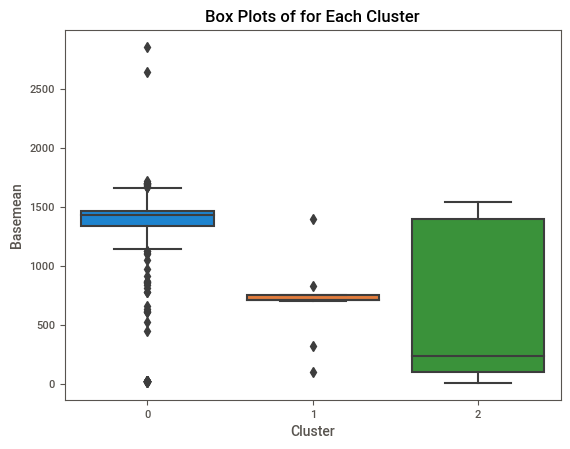

In [71]:
sns.boxplot(x='cluster', y='basemean', data=data)
plt.xlabel('Cluster')
plt.ylabel('Basemean')
plt.title('Box Plots of for Each Cluster')
plt.show()

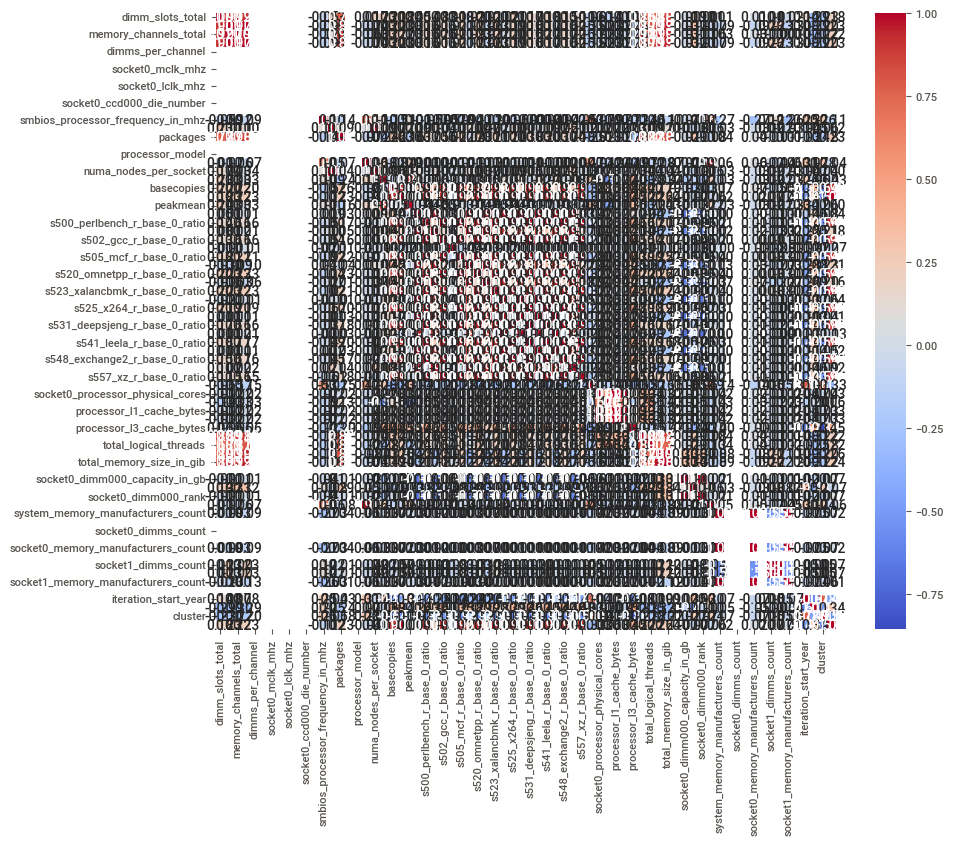

In [74]:
# Assuming 'important_test_columns' is a list of your identified important test columns
important_test_columns =['s520_omnetpp_r_base_0_ratio', 's505_mcf_r_base_0_ratio', 's523_xalancbmk_r_base_0_ratio']
# Select the relevant columns
selected_columns = important_test_columns + ['basemean']

# Create a DataFrame with selected columns
selected_data = df_cleaned

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


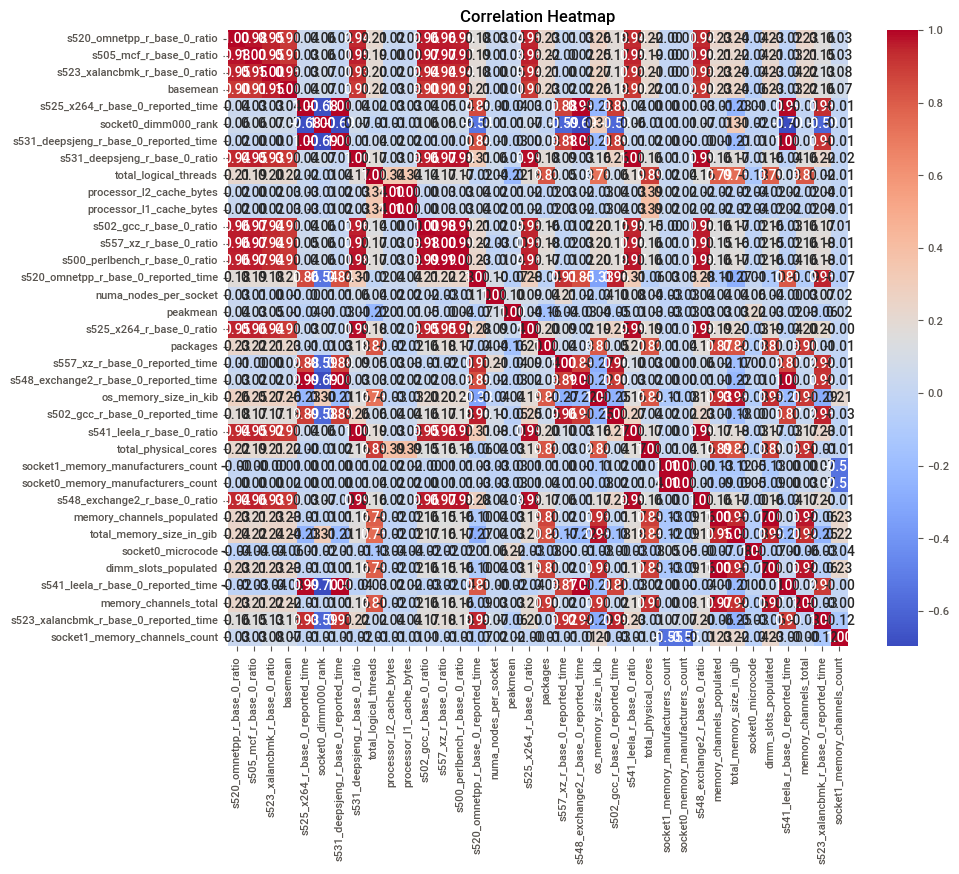

Top Contributing Columns to basemean:
s523_xalancbmk_r_base_0_ratio            0.953920
s505_mcf_r_base_0_ratio                  0.912845
s500_perlbench_r_base_0_ratio            0.908882
s557_xz_r_base_0_ratio                   0.907201
s548_exchange2_r_base_0_ratio            0.904186
s502_gcc_r_base_0_ratio                  0.903785
s531_deepsjeng_r_base_0_ratio            0.903412
s520_omnetpp_r_base_0_ratio              0.901615
s541_leela_r_base_0_ratio                0.900420
s525_x264_r_base_0_ratio                 0.899070
os_memory_size_in_kib                    0.259902
total_memory_size_in_gib                 0.241140
dimm_slots_populated                     0.230301
memory_channels_populated                0.230301
packages                                 0.228600
memory_channels_total                    0.220882
total_logical_threads                    0.217028
total_physical_cores                     0.216378
s520_omnetpp_r_base_0_reported_time      0.210034
s502_gcc_r_b

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
important_test_columns = ['s520_omnetpp_r_base_0_ratio', 's505_mcf_r_base_0_ratio', 's523_xalancbmk_r_base_0_ratio']
# Assuming 'overall_score' is your target variable
target_variable = 'basemean'
c = highly_correlated.difference(selected_columns)

# Select the relevant columns
selected_columns = important_test_columns + [target_variable] + list(c)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
important_test_columns = ['s520_omnetpp_r_base_0_ratio', 's505_mcf_r_base_0_ratio', 's523_xalancbmk_r_base_0_ratio']
# Assuming 'overall_score' is your target variable
target_variable = 'basemean'
c = highly_correlated.difference(selected_columns)

# Select the relevant columns
selected_columns = important_test_columns + [target_variable] + list(c)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]
selected_columns

['s520_omnetpp_r_base_0_ratio',
 's505_mcf_r_base_0_ratio',
 's523_xalancbmk_r_base_0_ratio',
 'basemean']

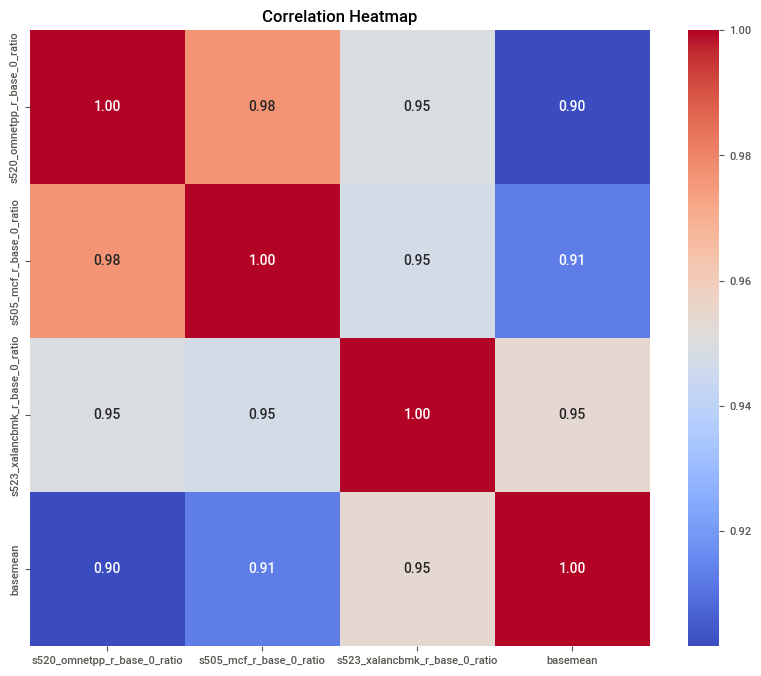

Top Contributing Columns to basemean:
s523_xalancbmk_r_base_0_ratio    0.953920
s505_mcf_r_base_0_ratio          0.912845
s520_omnetpp_r_base_0_ratio      0.901615
Name: basemean, dtype: float64


In [77]:
# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)

In [78]:
c = highly_correlated.difference(selected_columns)
c

{'dimm_slots_populated',
 'memory_channels_populated',
 'memory_channels_total',
 'numa_nodes_per_socket',
 'os_memory_size_in_kib',
 'packages',
 'peakmean',
 'processor_l1_cache_bytes',
 'processor_l2_cache_bytes',
 's500_perlbench_r_base_0_ratio',
 's502_gcc_r_base_0_ratio',
 's502_gcc_r_base_0_reported_time',
 's520_omnetpp_r_base_0_reported_time',
 's523_xalancbmk_r_base_0_reported_time',
 's525_x264_r_base_0_ratio',
 's525_x264_r_base_0_reported_time',
 's531_deepsjeng_r_base_0_ratio',
 's531_deepsjeng_r_base_0_reported_time',
 's541_leela_r_base_0_ratio',
 's541_leela_r_base_0_reported_time',
 's548_exchange2_r_base_0_ratio',
 's548_exchange2_r_base_0_reported_time',
 's557_xz_r_base_0_ratio',
 's557_xz_r_base_0_reported_time',
 'socket0_dimm000_rank',
 'socket0_memory_manufacturers_count',
 'socket0_microcode',
 'socket1_memory_channels_count',
 'socket1_memory_manufacturers_count',
 'total_logical_threads',
 'total_memory_size_in_gib',
 'total_physical_cores'}

In [79]:
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')

In [80]:
selected_columns

basemean  s500_perlbench_r_base_0_ratio  s502_gcc_r_base_0_ratio  \
701    1371.571584                     914.663068               819.427913   
755     745.285858                     612.708864               563.538624   
846    1321.522944                     914.663068               819.427913   
951    1343.212416                     914.663068               819.427913   
1006   1454.885760                     914.663068               819.427913   
...            ...                            ...                      ...   
27198  1446.512297                    1098.966528              1000.822656   
27207  1216.369355                     958.793088               953.104320   
27306  1216.369355                     958.793088               953.104320   
27385  1446.512297                    1098.966528              1000.822656   
27412  1221.975410                     952.651968               955.357056   

       s505_mcf_r_base_0_ratio  s520_omnetpp_r_base_0_ratio  \
701                1628.762309                   595.117634   
755                 933.411264                   314.336448   
846                1628.762309                   595.117634   
951                1628.762309                   595.117634   
1006               1628.762309                   595.117634   
...                        ...                          ...   
27198              2022.276480                   749.145600   
27207              1668.364992                   631.791744   
27306              1668.364992                   631.791744   
27385              2022.276480                   749.145600   
27412              1665.043968                   628.881216   

       s523_xalancbmk_r_base_0_ratio  s525_x264_r_base_0_ratio  \
701                      1371.571584               2793.545613   
755                       709.445376               1695.301632   
846                      1321.522944               2793.545613   
951                      1343.212416               2793.545613   
1006                     1454.885760               2793.545613   
...                              ...                       ...   
27198                    1524.296448               3418.515456   
27207                    1541.552256               2990.305152   
27306                    1541.552256               2990.305152   
27385                    1524.296448               3418.515456   
27412                    1529.341824               3010.996416   

       s531_deepsjeng_r_base_0_ratio  s541_leela_r_base_0_ratio  \
701                      1070.209781                1066.249931   
755                       719.808192                 710.920128   
846                      1070.209781                1066.249931   
951                      1070.209781                1066.249931   
1006                     1070.209781                1066.249931   
...                              ...                        ...   
27198                    1283.749248                1283.172096   
27207                    1002.143616                 914.574720   
27306                    1002.143616                 914.574720   
27385                    1283.749248                1283.172096   
27412                    1005.686784                 916.867968   

       s548_exchange2_r_base_0_ratio  s557_xz_r_base_0_ratio  
701                      2974.815015              643.148061  
755                      1975.898112              429.155904  
846                      2974.815015              643.148061  
951                      2974.815015              643.148061  
1006                     2974.815015              643.148061  
...                              ...                     ...  
27198                    3600.046848              783.673728  
27207                    3249.689280              553.754688  
27306                    3249.689280              553.754688  
27385                    3600.046848              783.673728  
27412                    

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
# Assuming 'overall_score' is your target variable
target_variable = 's523_xalancbmk_r_base_0_ratio'
c1 = highly_correlated.difference(selected_columns)

# Select the relevant columns
selected_columns =  [target_variable] + list(c1)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]
selected_data

s523_xalancbmk_r_base_0_ratio  s531_deepsjeng_r_base_0_ratio  \
701                      1371.571584                    1070.209781   
755                       709.445376                     719.808192   
846                      1321.522944                    1070.209781   
951                      1343.212416                    1070.209781   
1006                     1454.885760                    1070.209781   
...                              ...                            ...   
27198                    1524.296448                    1283.749248   
27207                    1541.552256                    1002.143616   
27306                    1541.552256                    1002.143616   
27385                    1524.296448                    1283.749248   
27412                    1529.341824                    1005.686784   

          basemean  s505_mcf_r_base_0_ratio  s502_gcc_r_base_0_ratio  \
701    1371.571584              1628.762309               819.427913   
755     745.285858               933.411264               563.538624   
846    1321.522944              1628.762309               819.427913   
951    1343.212416              1628.762309               819.427913   
1006   1454.885760              1628.762309               819.427913   
...            ...                      ...                      ...   
27198  1446.512297              2022.276480              1000.822656   
27207  1216.369355              1668.364992               953.104320   
27306  1216.369355              1668.364992               953.104320   
27385  1446.512297              2022.276480              1000.822656   
27412  1221.975410              1665.043968               955.357056   

       s557_xz_r_base_0_ratio  s500_perlbench_r_base_0_ratio  \
701                643.148061                     914.663068   
755                429.155904                     612.708864   
846                643.148061                     914.663068   
951                643.148061                     914.663068   
1006               643.148061                     914.663068   
...                       ...                            ...   
27198              783.673728                    1098.966528   
27207              553.754688                     958.793088   
27306              553.754688                     958.793088   
27385              783.673728                    1098.966528   
27412              560.959104                     952.651968   

       s525_x264_r_base_0_ratio  s520_omnetpp_r_base_0_ratio  \
701                 2793.545613                   595.117634   
755                 1695.301632                   314.336448   
846                 2793.545613                   595.117634   
951                 2793.545613                   595.117634   
1006                2793.545613                   595.117634   
...                         ...                          ...   
27198               3418.515456                   749.145600   
27207               2990.305152                   631.791744   
27306               2990.305152                   631.791744   
27385               3418.515456                   749.145600   
27412               3010.996416                   628.881216   

       s523_xalancbmk_r_base_0_ratio  s541_leela_r_base_0_ratio  \
701                      1371.571584                1066.249931   
755                       709.445376                 710.920128   
846                      1321.522944                1066.249931   
951                      1343.212416                1066.249931   
1006                     1454.885760                1066.249931   
...                              ...                        ...   
27198                    1524.296448                1283.172096   
27207                    1541.552256                 914.574720   
27306                    1541.552256                 914.574720   
27385                    1524.296448                1283.172096   
27412         

In [83]:
# Calculate correlation matrix
#selected_data
#selected_data = selected_data.drop(columns=selected_columns)
correlation_matrix = selected_data.corr()
#selected_data
# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# # Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [85]:
selected_columns1 = df.filter(regex=r'^s5.*ratio$|basemean')

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
# Assuming 'overall_score' is your target variable
target_variable = 's505_mcf_r_base_0_ratio'
c1 = highly_correlated.difference(selected_columns1)

# Select the relevant columns
selected_columns =  [target_variable] + list(c1)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]
selected_data

s505_mcf_r_base_0_ratio  s525_x264_r_base_0_reported_time  \
701                1628.762309                        197.812191   
755                 933.411264                        198.308071   
846                1628.762309                        197.812191   
951                1628.762309                        197.812191   
1006               1628.762309                        197.812191   
...                        ...                               ...   
27198              2022.276480                        196.688881   
27207              1668.364992                        112.427324   
27306              1668.364992                        112.427324   
27385              2022.276480                        196.688881   
27412              1665.043968                        111.654733   

       socket0_dimm000_rank  s531_deepsjeng_r_base_0_reported_time  \
701                     2.0                             339.594953   
755                     2.0                             305.681393   
846                     2.0                             339.594953   
951                     2.0                             339.594953   
1006                    2.0                             339.594953   
...                     ...                                    ...   
27198                   2.0                             342.795922   
27207                   2.0                             219.561352   
27306                   2.0                             219.561352   
27385                   2.0                             342.795922   
27412                   2.0                             218.787787   

       total_logical_threads  processor_l2_cache_bytes  \
701                    384.0               100663296.0   
755                    192.0               100663296.0   
846                    384.0               100663296.0   
951                    384.0               100663296.0   
1006                   384.0               100663296.0   
...                      ...                       ...   
27198                  192.0               100663296.0   
27207                  384.0               100663296.0   
27306                  384.0               100663296.0   
27385                  384.0               100663296.0   
27412                  192.0               100663296.0   

       processor_l1_cache_bytes  s520_omnetpp_r_base_0_reported_time  \
701                   6291456.0                           677.467655   
755                   6291456.0                           801.383436   
846                   6291456.0                           677.467655   
951                   6291456.0                           677.467655   
1006                  6291456.0                           677.467655   
...                         ...                                  ...   
27198                 6291456.0                           672.510226   
27207                 6291456.0                           398.713713   
27306                 6291456.0                           398.713713   
27385                 6291456.0                           672.510226   
27412                 6291456.0                           400.558981   

       numa_nodes_per_socket     peakmean  ...  \
701                      1.0    -1.000000  ...   
755                      1.0    -1.000000  ...   
846                      1.0    -1.000000  ...   
951                      1.0    -1.000000  ...   
1006                     1.0    -1.000000  ...   
...                      ...          ...  ...   
27198                    1.0  1531.504593  ...   
27207                    1.0  1265.926984  ...   
27306                    1.0  1269.074491  ...   
27385                   12.0  1531.504593  ...   
27412                    1.0  1278.505118  ...   

       socket1_memory_manufacturers_count  socket0_memory_manufacturers_count  \
701                              1.000000                                 1.0   
755                     

In [88]:
correlation_matrix = selected_data.corr()
#selected_data
# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# # Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)

Top Contributing Columns to s505_mcf_r_base_0_ratio:
os_memory_size_in_kib                    0.247033
total_memory_size_in_gib                 0.221341
packages                                 0.215313
dimm_slots_populated                     0.211272
memory_channels_populated                0.211272
memory_channels_total                    0.209791
total_physical_cores                     0.194944
total_logical_threads                    0.193197
s520_omnetpp_r_base_0_reported_time      0.190427
s502_gcc_r_base_0_reported_time          0.174358
s523_xalancbmk_r_base_0_reported_time    0.153810
socket0_dimm000_rank                     0.063432
socket0_microcode                        0.039790
s541_leela_r_base_0_reported_time        0.034026
socket1_memory_channels_count            0.030962
s525_x264_r_base_0_reported_time         0.030887
peakmean                                 0.028807
s548_exchange2_r_base_0_reported_time    0.021799
numa_nodes_per_socket                    0.0103

In [89]:
selected_data

s505_mcf_r_base_0_ratio  s525_x264_r_base_0_reported_time  \
701                1628.762309                        197.812191   
755                 933.411264                        198.308071   
846                1628.762309                        197.812191   
951                1628.762309                        197.812191   
1006               1628.762309                        197.812191   
...                        ...                               ...   
27198              2022.276480                        196.688881   
27207              1668.364992                        112.427324   
27306              1668.364992                        112.427324   
27385              2022.276480                        196.688881   
27412              1665.043968                        111.654733   

       socket0_dimm000_rank  s531_deepsjeng_r_base_0_reported_time  \
701                     2.0                             339.594953   
755                     2.0                             305.681393   
846                     2.0                             339.594953   
951                     2.0                             339.594953   
1006                    2.0                             339.594953   
...                     ...                                    ...   
27198                   2.0                             342.795922   
27207                   2.0                             219.561352   
27306                   2.0                             219.561352   
27385                   2.0                             342.795922   
27412                   2.0                             218.787787   

       total_logical_threads  processor_l2_cache_bytes  \
701                    384.0               100663296.0   
755                    192.0               100663296.0   
846                    384.0               100663296.0   
951                    384.0               100663296.0   
1006                   384.0               100663296.0   
...                      ...                       ...   
27198                  192.0               100663296.0   
27207                  384.0               100663296.0   
27306                  384.0               100663296.0   
27385                  384.0               100663296.0   
27412                  192.0               100663296.0   

       processor_l1_cache_bytes  s520_omnetpp_r_base_0_reported_time  \
701                   6291456.0                           677.467655   
755                   6291456.0                           801.383436   
846                   6291456.0                           677.467655   
951                   6291456.0                           677.467655   
1006                  6291456.0                           677.467655   
...                         ...                                  ...   
27198                 6291456.0                           672.510226   
27207                 6291456.0                           398.713713   
27306                 6291456.0                           398.713713   
27385                 6291456.0                           672.510226   
27412                 6291456.0                           400.558981   

       numa_nodes_per_socket     peakmean  ...  \
701                      1.0    -1.000000  ...   
755                      1.0    -1.000000  ...   
846                      1.0    -1.000000  ...   
951                      1.0    -1.000000  ...   
1006                     1.0    -1.000000  ...   
...                      ...          ...  ...   
27198                    1.0  1531.504593  ...   
27207                    1.0  1265.926984  ...   
27306                    1.0  1269.074491  ...   
27385                   12.0  1531.504593  ...   
27412                    1.0  1278.505118  ...   

       socket1_memory_manufacturers_count  socket0_memory_manufacturers_count  \
701                              1.000000                                 1.0   
755                     

In [90]:
data

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701    ...                                 1.0                         1.0   
755    ...                                 1.0                         1.0   
846    ...                                 1.0                         1.0   
951    ...                                 1.0                         1.0   
1006   ...                                 2.0                         1.0   
...    ...                                 ...                         ...   
27198  ...                                 1.0                         1.0   
27207  ...                                 1.0                         1.0   
27306  ...                                 1.0                         1.0   
27385  ...                                 1.0                         1.0   
27412  ...                                 1.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
701              12.000000                      12.000000   
755              11.931034                      11.931034   
846              12.000000                      12.000000   
951              12.000000                      12.000000   
1006             12.000000                      12

In [91]:
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701    ...                                 1.0                         1.0   
755    ...                                 1.0                         1.0   
846    ...                                 1.0                         1.0   
951    ...                                 1.0                         1.0   
1006   ...                                 2.0                         1.0   
...    ...                                 ...                         ...   
27198  ...                                 1.0                         1.0   
27207  ...                                 1.0                         1.0   
27306  ...                                 1.0                         1.0   
27385  ...                                 1.0                         1.0   
27412  ...                                 1.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
701              12.000000                      12.000000   
755              11.931034                      11.931034   
846              12.000000                      12.000000   
951              12.000000                      12.000000   
1006             12.000000                      12

In [92]:
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
755                12.0                  12.0                   12.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
755                         12.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
755                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701    ...                                 1.0                         1.0   
755    ...                                 1.0                         1.0   
846    ...                                 1.0                         1.0   
951    ...                                 1.0                         1.0   
1006   ...                                 2.0                         1.0   
...    ...                                 ...                         ...   
27198  ...                                 1.0                         1.0   
27207  ...                                 1.0                         1.0   
27306  ...                                 1.0                         1.0   
27385  ...                                 1.0                         1.0   
27412  ...                                 1.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
701              12.000000                      12.000000   
755              11.931034                      11.931034   
846              12.000000                      12.000000   
951              12.000000                      12.000000   
1006             12.000000                      12

## Recommendation


In [93]:
cluster_labels_of_interest = [0]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


dimm_slots_total  dimm_slots_populated  memory_channels_total  \
701                24.0                  24.0                   24.0   
846                24.0                  24.0                   24.0   
951                24.0                  24.0                   24.0   
1006               24.0                  24.0                   24.0   
1082               24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
27198              28.0                  24.0                   24.0   
27207              28.0                  24.0                   24.0   
27306              28.0                  24.0                   24.0   
27385              24.0                  24.0                   24.0   
27412              28.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
701                         24.0                1.0              -1.0   
846                         24.0                1.0              -1.0   
951                         24.0                1.0              -1.0   
1006                        24.0                1.0              -1.0   
1082                        24.0                1.0              -1.0   
...                          ...                ...               ...   
27198                       24.0                1.0              -1.0   
27207                       24.0                1.0              -1.0   
27306                       24.0                1.0              -1.0   
27385                       24.0                1.0              -1.0   
27412                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
701                -1.0              -1.0              -1.0              -1.0   
846                -1.0              -1.0              -1.0              -1.0   
951                -1.0              -1.0              -1.0              -1.0   
1006               -1.0              -1.0              -1.0              -1.0   
1082               -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
27198              -1.0              -1.0              -1.0              -1.0   
27207              -1.0              -1.0              -1.0              -1.0   
27306              -1.0              -1.0              -1.0              -1.0   
27385              -1.0              -1.0              -1.0              -1.0   
27412              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
701    ...                                 1.0                         1.0   
846    ...                                 1.0                         1.0   
951    ...                                 1.0                         1.0   
1006   ...                                 2.0                         1.0   
1082   ...                                 1.0                         1.0   
...    ...                                 ...                         ...   
27198  ...                                 1.0                         1.0   
27207  ...                                 1.0                         1.0   
27306  ...                                 1.0                         1.0   
27385  ...                                 1.0                         1.0   
27412  ...                                 1.0                         1.0   

       socket1_dimms_count  socket1_memory_channels_count  \
701                   12.0                           12.0   
846                   12.0                           12.0   
951                   12.0                           12.0   
1006                  12.0                           12.0   
1082                  12.0                        

In [94]:
cluster_labels_of_interest = [1]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


dimm_slots_total  dimm_slots_populated  memory_channels_total  \
755                12.0                  12.0                   12.0   
1387               12.0                  12.0                   12.0   
2509               12.0                  12.0                   12.0   
5996               12.0                  12.0                   12.0   
6370               12.0                  12.0                   12.0   
8116               12.0                  12.0                   12.0   
8233               12.0                  12.0                   12.0   
8296               12.0                  12.0                   12.0   
9939               12.0                  12.0                   12.0   
12648              12.0                  12.0                   12.0   
16185              12.0                  12.0                   12.0   
16596              12.0                  12.0                   12.0   
17908              12.0                  12.0                   12.0   
19836              12.0                  12.0                   12.0   
21080              12.0                  12.0                   12.0   
22442              12.0                  12.0                   12.0   
24915              12.0                  12.0                   12.0   
26656              24.0                  24.0                   24.0   
26703              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
755                         12.0                1.0              -1.0   
1387                        12.0                1.0              -1.0   
2509                        12.0                1.0              -1.0   
5996                        12.0                1.0              -1.0   
6370                        12.0                1.0              -1.0   
8116                        12.0                1.0              -1.0   
8233                        12.0                1.0              -1.0   
8296                        12.0                1.0              -1.0   
9939                        12.0                1.0              -1.0   
12648                       12.0                1.0              -1.0   
16185                       12.0                1.0              -1.0   
16596                       12.0                1.0              -1.0   
17908                       12.0                1.0              -1.0   
19836                       12.0                1.0              -1.0   
21080                       12.0                1.0              -1.0   
22442                       12.0                1.0              -1.0   
24915                       12.0                1.0              -1.0   
26656                       24.0                1.0              -1.0   
26703                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
755                -1.0              -1.0              -1.0              -1.0   
1387               -1.0              -1.0              -1.0              -1.0   
2509               -1.0              -1.0              -1.0              -1.0   
5996               -1.0              -1.0              -1.0              -1.0   
6370               -1.0              -1.0              -1.0              -1.0   
8116               -1.0              -1.0              -1.0              -1.0   
8233               -1.0              -1.0              -1.0              -1.0   
8296               -1.0              -1.0              -1.0              -1.0   
9939               -1.0              -1.0              -1.0              -1.0   
12648              -1.0              -1.0              -1.0              -1.0   
16185              -1.0              -1.0              -1.0              -1.0   
16596              -1.0              -1.0              -1.0              -1.0   
17908              -1.0              -1.0           

In [95]:
cluster_labels_of_interest = [2]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


dimm_slots_total  dimm_slots_populated  memory_channels_total  \
1031               24.0                  24.0                   24.0   
1098               24.0                  24.0                   24.0   
1234               24.0                  24.0                   24.0   
1253               24.0                  24.0                   24.0   
1369               24.0                  24.0                   24.0   
2460               24.0                  24.0                   24.0   
2986               24.0                  24.0                   24.0   
3227               24.0                  24.0                   24.0   
4148               24.0                  24.0                   24.0   
4853               24.0                  24.0                   24.0   
4854               24.0                  24.0                   24.0   
4964               24.0                  24.0                   24.0   
5884               24.0                  24.0                   24.0   
7835               24.0                  24.0                   24.0   
8184               24.0                  24.0                   24.0   
9325               24.0                  24.0                   24.0   
9384               24.0                  24.0                   24.0   
9420               24.0                  24.0                   24.0   
9476               24.0                  24.0                   24.0   
9656               24.0                  24.0                   24.0   
9928               24.0                  24.0                   24.0   
9956               24.0                  24.0                   24.0   
10024              24.0                  24.0                   24.0   
10862              24.0                  24.0                   24.0   
11046              24.0                  24.0                   24.0   
11436              24.0                  24.0                   24.0   
11452              24.0                  24.0                   24.0   
12521              24.0                  24.0                   24.0   
12634              24.0                  24.0                   24.0   
12753              24.0                  24.0                   24.0   
14669              24.0                  24.0                   24.0   
14804              24.0                  24.0                   24.0   
14833              24.0                  24.0                   24.0   
14987              24.0                  24.0                   24.0   
15875              24.0                  24.0                   24.0   
15916              24.0                  24.0                   24.0   
16257              24.0                  24.0                   24.0   
17575              24.0                  24.0                   24.0   
17901              24.0                  24.0                   24.0   
18134              24.0                  24.0                   24.0   
19779              24.0                  24.0                   24.0   
20059              24.0                  24.0                   24.0   
20961              24.0                  24.0                   24.0   
20965              24.0                  24.0                   24.0   
21633              24.0                  24.0                   24.0   
22571              24.0                  24.0                   24.0   
22616              24.0                  24.0                   24.0   
22938              24.0                  24.0                   24.0   
22944              24.0                  24.0                   24.0   
24067              24.0                  24.0                   24.0   
24271              24.0                  24.0                   24.0   
24480              24.0                  24.0                   24.0   
24624              24.0                  24.0                   24.0   
26085              24.0                  24.0                   24.0   
26244              24.0                  24.0  

In [96]:
cluster_labels_of_interest = [3]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


Empty DataFrame
Columns: [dimm_slots_total, dimm_slots_populated, memory_channels_total, memory_channels_populated, dimms_per_channel, socket0_fclk_mhz, socket0_mclk_mhz, socket0_cclk_mhz, socket0_lclk_mhz, socket0_uclk_mhz, socket0_ccd000_die_number, ctdp_in_watts, smbios_processor_frequency_in_mhz, numa_zones, packages, processor_family, processor_model, processor_stepping, numa_nodes_per_socket, iterations, basecopies, basemean, peakmean, s500_perlbench_r_base_0_reported_time, s500_perlbench_r_base_0_ratio, s502_gcc_r_base_0_reported_time, s502_gcc_r_base_0_ratio, s505_mcf_r_base_0_reported_time, s505_mcf_r_base_0_ratio, s520_omnetpp_r_base_0_reported_time, s520_omnetpp_r_base_0_ratio, s523_xalancbmk_r_base_0_reported_time, s523_xalancbmk_r_base_0_ratio, s525_x264_r_base_0_reported_time, s525_x264_r_base_0_ratio, s531_deepsjeng_r_base_0_reported_time, s531_deepsjeng_r_base_0_ratio, s541_leela_r_base_0_reported_time, s541_leela_r_base_0_ratio, s548_exchange2_r_base_0_reported_time, s548_exchange2_r_base_0_ratio, s557_xz_r_base_0_reported_time, s557_xz_r_base_0_ratio, kafka_offset, socket0_processor_physical_cores, socket0_processor_logical_threads, processor_l1_cache_bytes, processor_l2_cache_bytes, processor_l3_cache_bytes, total_physical_cores, total_logical_threads, os_memory_size_in_kib, total_memory_size_in_gib, memory_speed_in_mts, socket0_dimm000_capacity_in_gb, socket0_dimm000_rated_speed_in_mts, socket0_dimm000_rank, socket0_microcode, system_memory_manufacturers_count, system_memory_ranks_count, socket0_dimms_count, socket0_memory_channels_count, socket0_memory_manufacturers_count, socket0_memory_ranks_count, socket1_dimms_count, socket1_memory_channels_count, socket1_memory_manufacturers_count, socket1_memory_ranks_count, iteration_start_year, iteration_start_month, cluster, z_score]
Index: []

[0 rows x 72 columns]

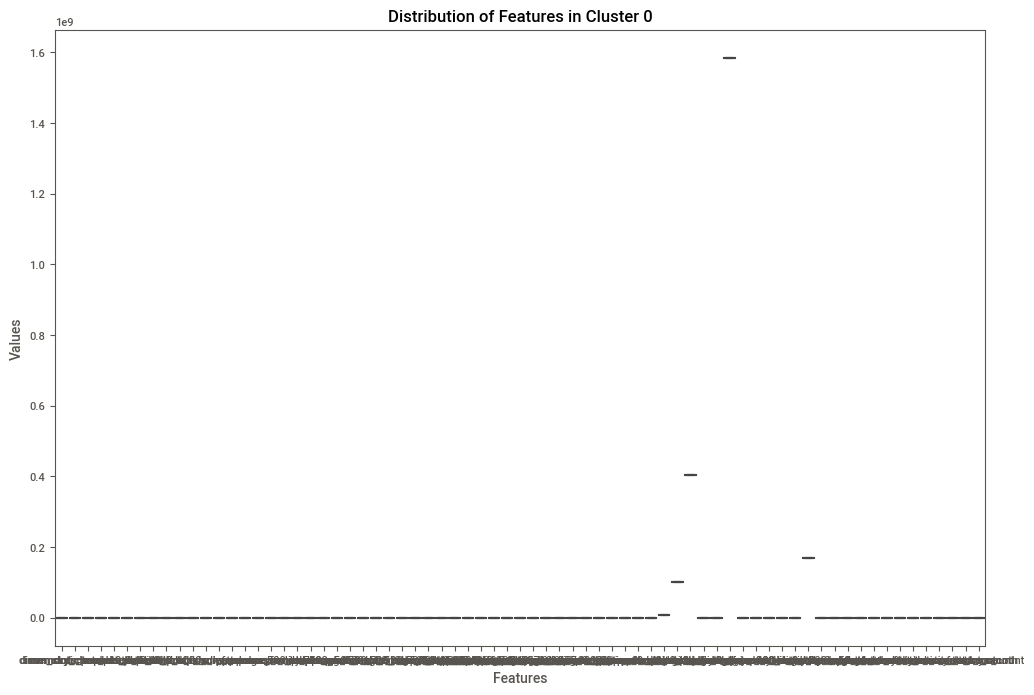

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'cluster' is the column specifying the cluster assignment
cluster_number = 0  # Change this to the desired cluster number

# Extract data for the specified cluster
single_cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_number]

# Plot features within the cluster (assuming numerical features)
plt.figure(figsize=(12, 8))
sns.boxplot(data=single_cluster_data.drop('cluster', axis=1), showfliers=False)
plt.title(f'Distribution of Features in Cluster {cluster_number}')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


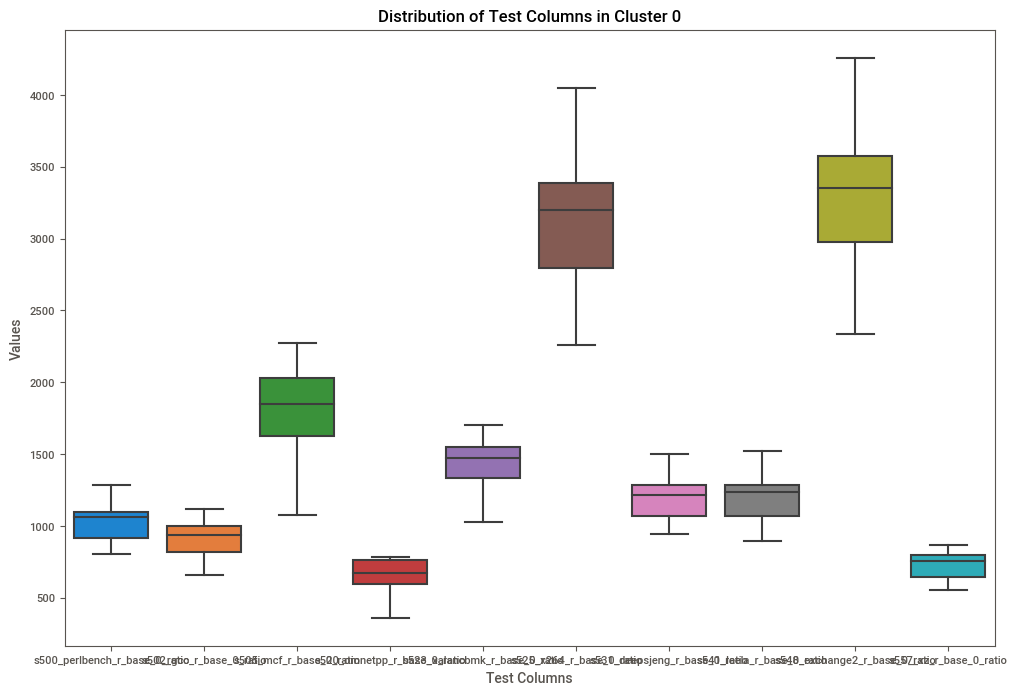

In [98]:
cluster_number = 0  # Change this to the desired cluster number
test_columns = [col for col in df_cleaned.columns if col.startswith('s5') and col.endswith('ratio')]

# Extract data for the specified cluster and only test columns
single_cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_number][test_columns]

# Plot test columns within the cluster
plt.figure(figsize=(12, 8))
sns.boxplot(data=single_cluster_data, showfliers=False)
plt.title(f'Distribution of Test Columns in Cluster {cluster_number}')
plt.xlabel('Test Columns')
plt.ylabel('Values')
plt.show()

In [99]:
single_cluster_data.columns

Index(['s500_perlbench_r_base_0_ratio', 's502_gcc_r_base_0_ratio',
       's505_mcf_r_base_0_ratio', 's520_omnetpp_r_base_0_ratio',
       's523_xalancbmk_r_base_0_ratio', 's525_x264_r_base_0_ratio',
       's531_deepsjeng_r_base_0_ratio', 's541_leela_r_base_0_ratio',
       's548_exchange2_r_base_0_ratio', 's557_xz_r_base_0_ratio'],
      dtype='object')

In [104]:
single_cluster_data

s500_perlbench_r_base_0_ratio  s502_gcc_r_base_0_ratio  \
701                       914.663068               819.427913   
846                       914.663068               819.427913   
951                       914.663068               819.427913   
1006                      914.663068               819.427913   
1082                      914.663068               819.427913   
...                              ...                      ...   
27198                    1098.966528              1000.822656   
27207                     958.793088               953.104320   
27306                     958.793088               953.104320   
27385                    1098.966528              1000.822656   
27412                     952.651968               955.357056   

       s505_mcf_r_base_0_ratio  s520_omnetpp_r_base_0_ratio  \
701                1628.762309                   595.117634   
846                1628.762309                   595.117634   
951                1628.762309                   595.117634   
1006               1628.762309                   595.117634   
1082               1628.762309                   595.117634   
...                        ...                          ...   
27198              2022.276480                   749.145600   
27207              1668.364992                   631.791744   
27306              1668.364992                   631.791744   
27385              2022.276480                   749.145600   
27412              1665.043968                   628.881216   

       s523_xalancbmk_r_base_0_ratio  s525_x264_r_base_0_ratio  \
701                      1371.571584               2793.545613   
846                      1321.522944               2793.545613   
951                      1343.212416               2793.545613   
1006                     1454.885760               2793.545613   
1082                     1653.423360               2793.545613   
...                              ...                       ...   
27198                    1524.296448               3418.515456   
27207                    1541.552256               2990.305152   
27306                    1541.552256               2990.305152   
27385                    1524.296448               3418.515456   
27412                    1529.341824               3010.996416   

       s531_deepsjeng_r_base_0_ratio  s541_leela_r_base_0_ratio  \
701                      1070.209781                1066.249931   
846                      1070.209781                1066.249931   
951                      1070.209781                1066.249931   
1006                     1070.209781                1066.249931   
1082                     1070.209781                1066.249931   
...                              ...                        ...   
27198                    1283.749248                1283.172096   
27207                    1002.143616                 914.574720   
27306                    1002.143616                 914.574720   
27385                    1283.749248                1283.172096   
27412                    1005.686784                 916.867968   

       s548_exchange2_r_base_0_ratio  s557_xz_r_base_0_ratio  
701                      2974.815015              643.148061  
846                      2974.815015              643.148061  
951                      2974.815015              643.148061  
1006                     2974.815015              643.148061  
1082                     2974.815015              643.148061  
...                              ...                     ...  
27198                    3600.046848              783.673728  
27207                    3249.689280              553.754688  
27306                    3249.689280              553.754688  
27385                    3600.046848              783.673728  
27412                    3260.440512              560.959104  

[436 rows x 10 columns]

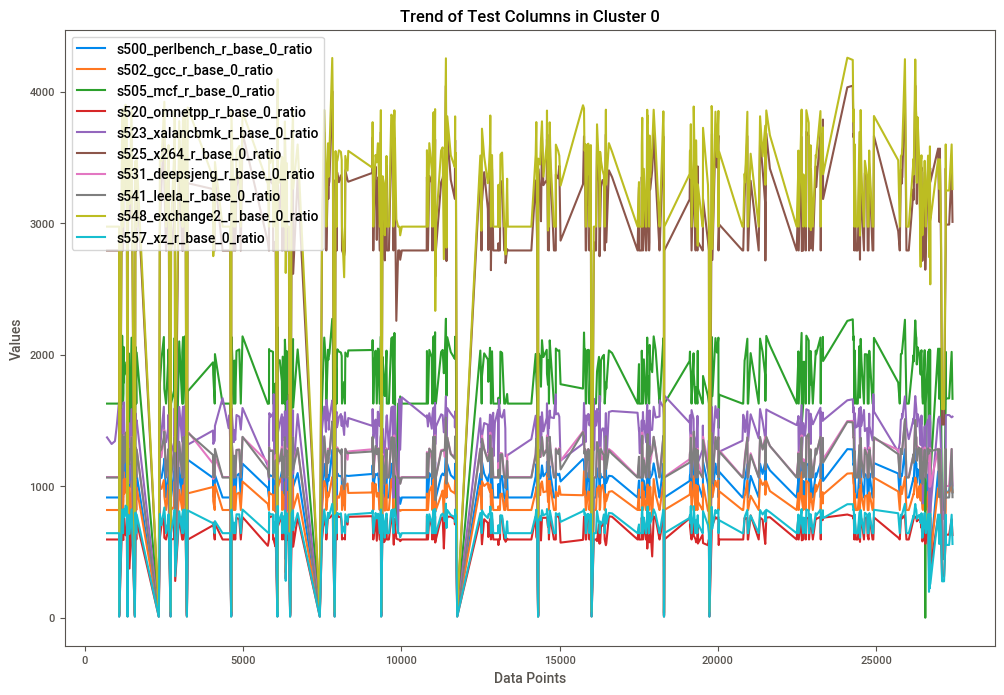

In [100]:
plt.figure(figsize=(12, 8))
for column in test_columns:
    sns.lineplot(data=single_cluster_data, x=single_cluster_data.index, y=column, label=column)

plt.title(f'Trend of Test Columns in Cluster {cluster_number}')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

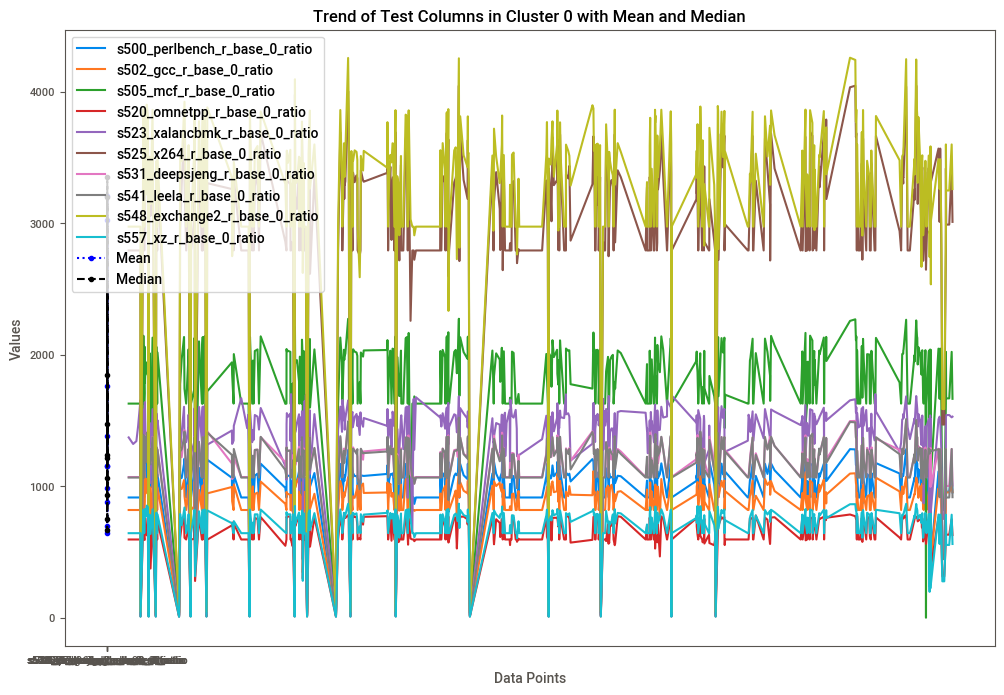

In [111]:
mean_values = single_cluster_data.mean()
median_values = single_cluster_data.median()

# Plot line graphs for mean and median of each test column
plt.figure(figsize=(12, 8))
for column in test_columns:
    sns.lineplot(data=single_cluster_data, x=single_cluster_data.index, y=column, label=column)

# Plot mean and median lines
plt.plot(mean_values, label='Mean', linestyle=':', marker='o', color='blue')
plt.plot(median_values, label='Median', linestyle='--', marker='o',color='black')

plt.title(f'Trend of Test Columns in Cluster {cluster_number} with Mean and Median')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

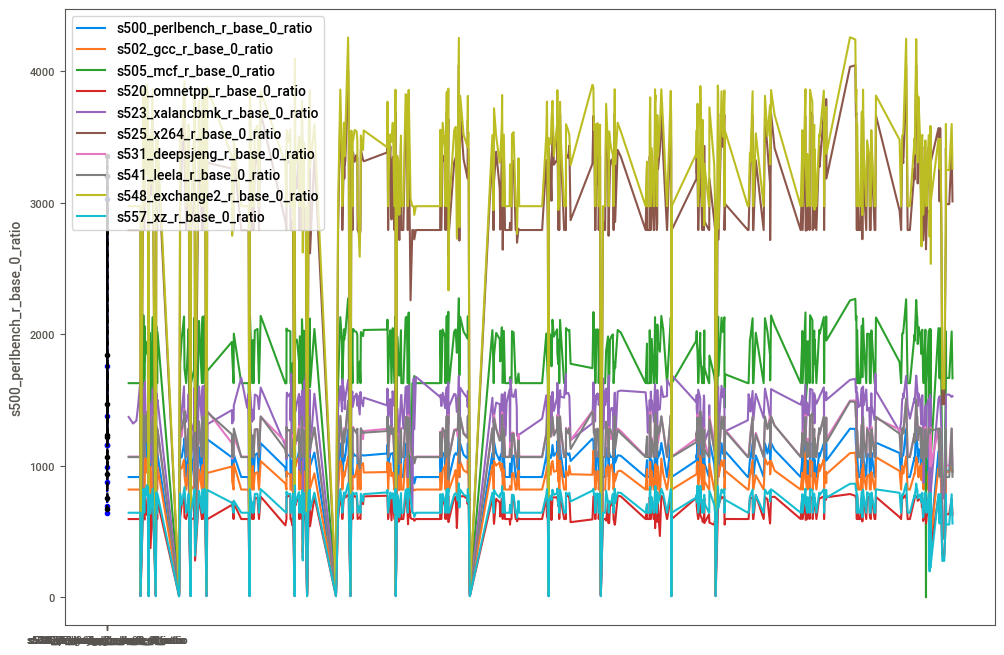

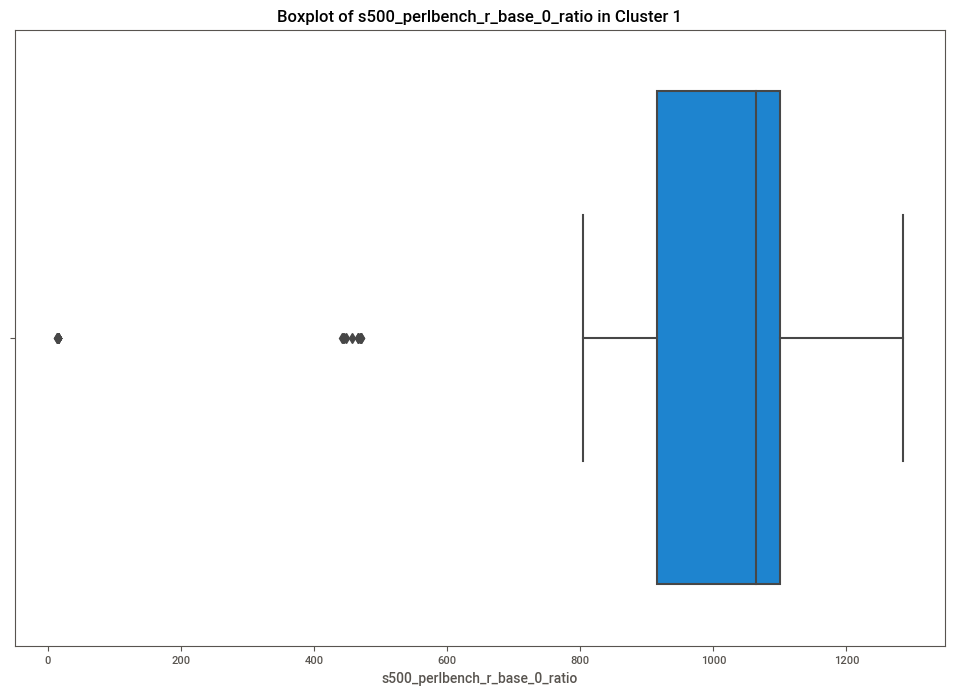

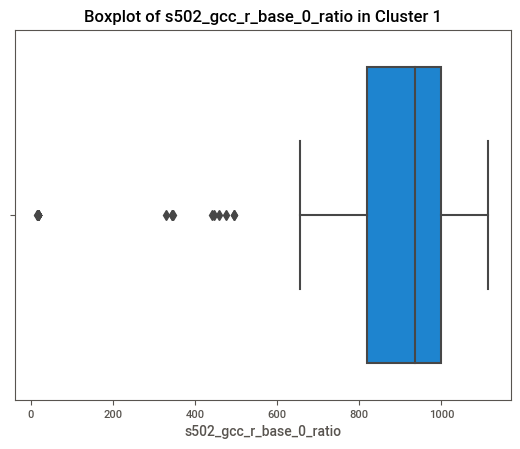

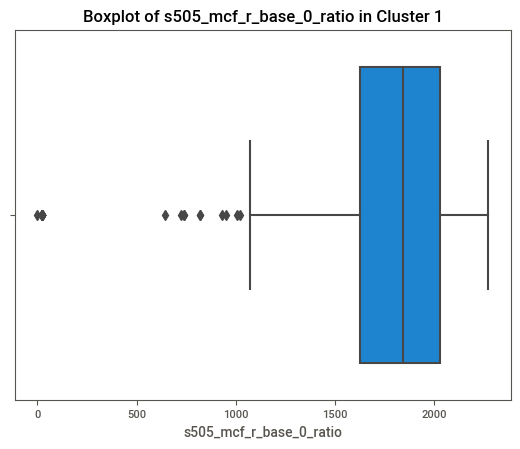

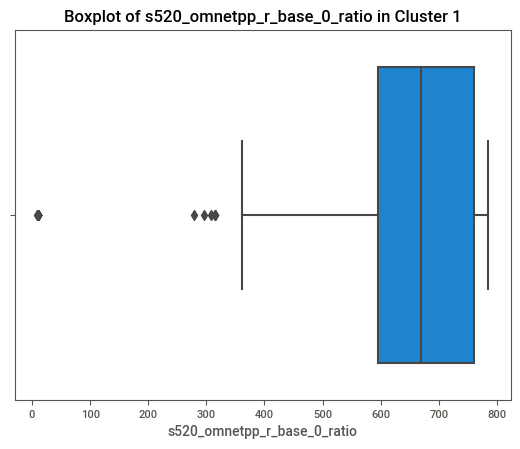

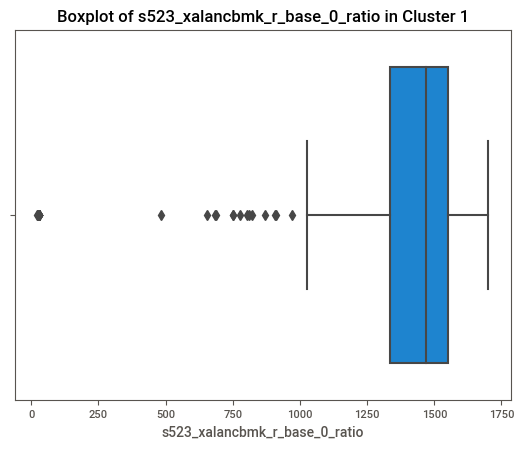

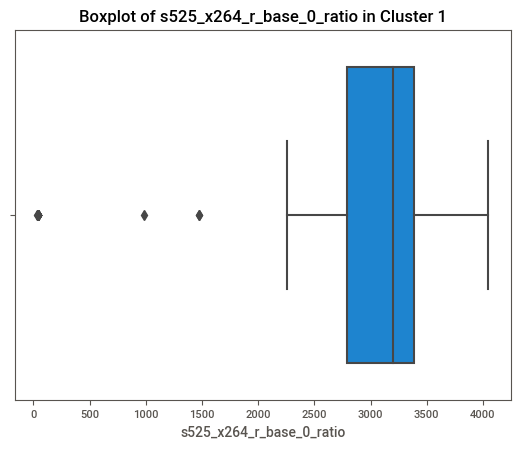

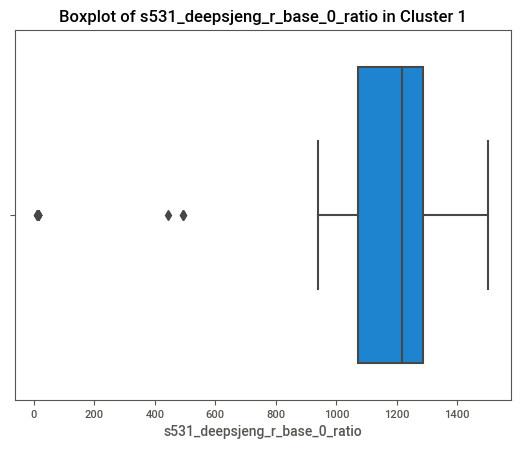

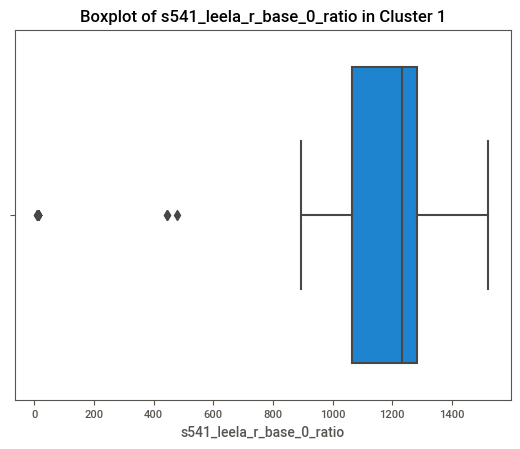

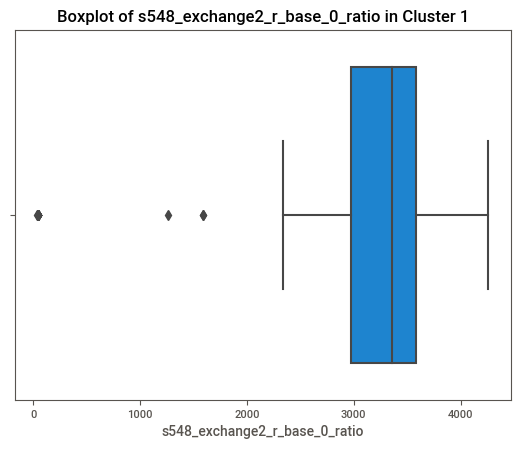

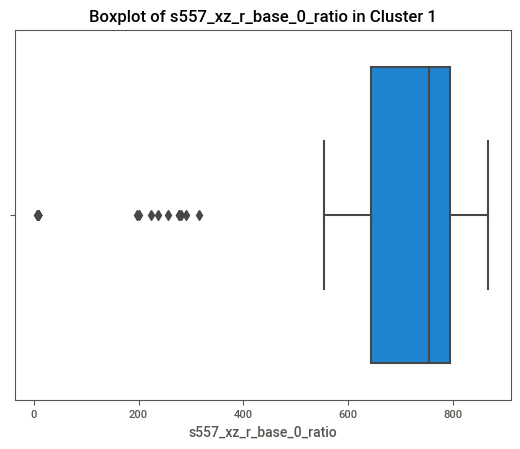

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Assuming single_cluster_data is your DataFrame and test_columns is a list of test columns
cluster_number = 1

# Calculate mean and median
mean_values = single_cluster_data.mean()
median_values = single_cluster_data.median()

# Plot line graphs for mean and median of each test column
plt.figure(figsize=(12, 8))
for column in test_columns:
    sns.lineplot(data=single_cluster_data, x=single_cluster_data.index, y=column, label=column)

# Plot mean and median lines
plt.plot(mean_values, label='Mean', linestyle=':', marker='o', color='blue')
plt.plot(median_values, label='Median', linestyle='--', marker='o', color='black')

# Identify and visualize outliers
plt.figure(figsize=(12, 8))
for column in test_columns:
    sns.boxplot(data=single_cluster_data, x=column)
    plt.title(f'Boxplot of {column} in Cluster {cluster_number}')
    plt.show()

# Calculate distances from mean and median
distance_from_mean = np.abs(single_cluster_data - mean_values)
distance_from_median = np.abs(single_cluster_data - median_values)


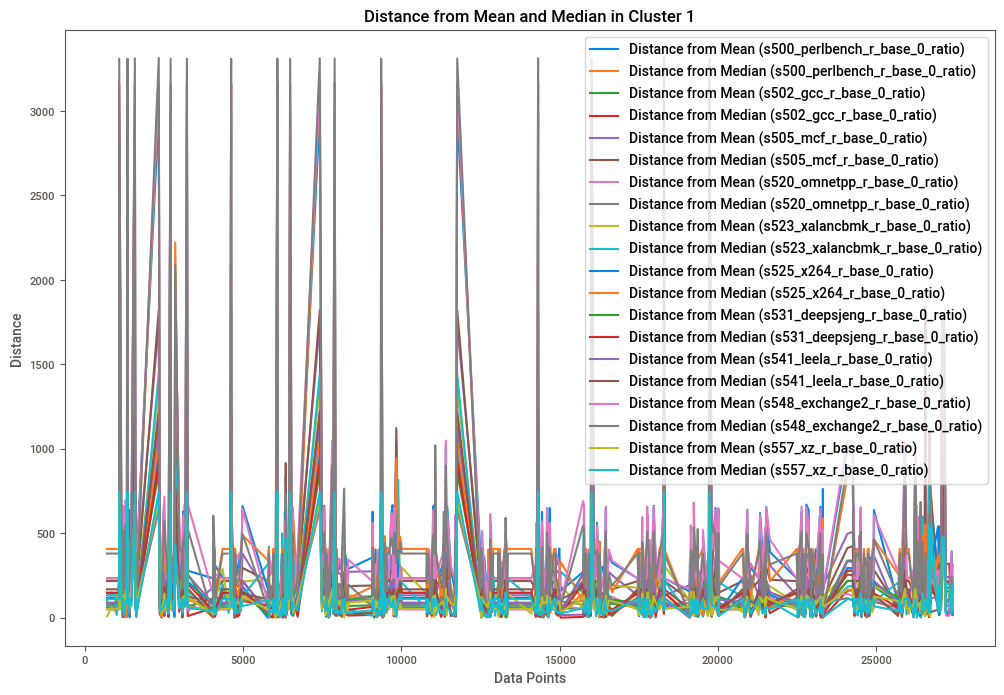

In [116]:

# Visualize distance from mean and median
plt.figure(figsize=(12, 8))
for column in test_columns:
    sns.lineplot(data=distance_from_mean[column], label=f'Distance from Mean ({column})')
    sns.lineplot(data=distance_from_median[column], label=f'Distance from Median ({column})')

plt.title(f'Distance from Mean and Median in Cluster {cluster_number}')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.legend()
plt.show()


T-test p-value for s500_perlbench_r_base_0_ratio: 1.0
T-test p-value for s502_gcc_r_base_0_ratio: 1.0
T-test p-value for s505_mcf_r_base_0_ratio: 1.0
T-test p-value for s520_omnetpp_r_base_0_ratio: 1.0
T-test p-value for s523_xalancbmk_r_base_0_ratio: 1.0
T-test p-value for s525_x264_r_base_0_ratio: 1.0
T-test p-value for s531_deepsjeng_r_base_0_ratio: 1.0
T-test p-value for s541_leela_r_base_0_ratio: 1.0
T-test p-value for s548_exchange2_r_base_0_ratio: 1.0
T-test p-value for s557_xz_r_base_0_ratio: 1.0


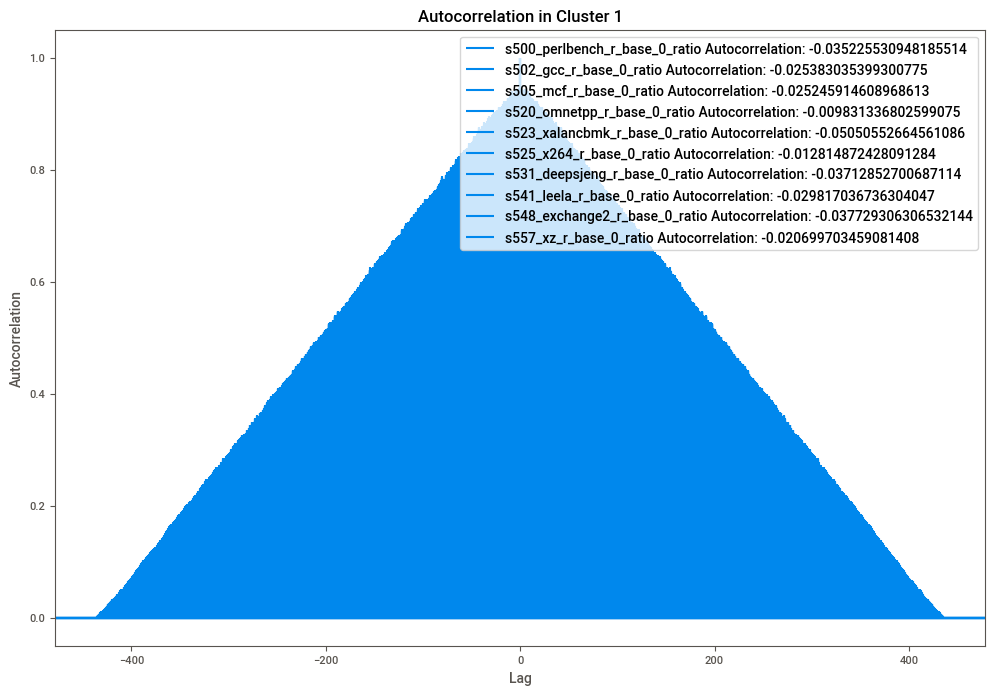

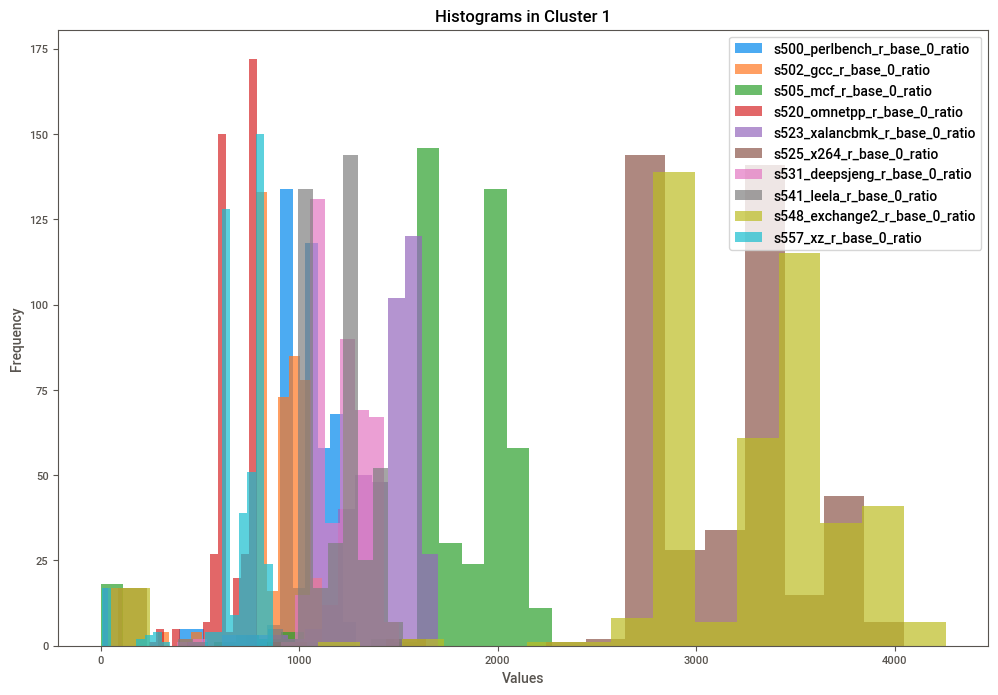

In [115]:

# Statistical tests (t-tests)
for column in test_columns:
    _, p_value = ttest_ind(single_cluster_data[column], mean_values[column])
    print(f'T-test p-value for {column}: {p_value}')

# Pattern Recognition - Autocorrelation
plt.figure(figsize=(12, 8))
for column in test_columns:
    autocorrelation = single_cluster_data[column].autocorr()
    plt.acorr(single_cluster_data[column], maxlags=len(single_cluster_data) - 1, label=f'{column} Autocorrelation: {autocorrelation}')

plt.title(f'Autocorrelation in Cluster {cluster_number}')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

# Distribution Analysis - Histograms
plt.figure(figsize=(12, 8))
for column in test_columns:
    plt.hist(single_cluster_data[column], bins=20, alpha=0.7, label=column)

plt.title(f'Histograms in Cluster {cluster_number}')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


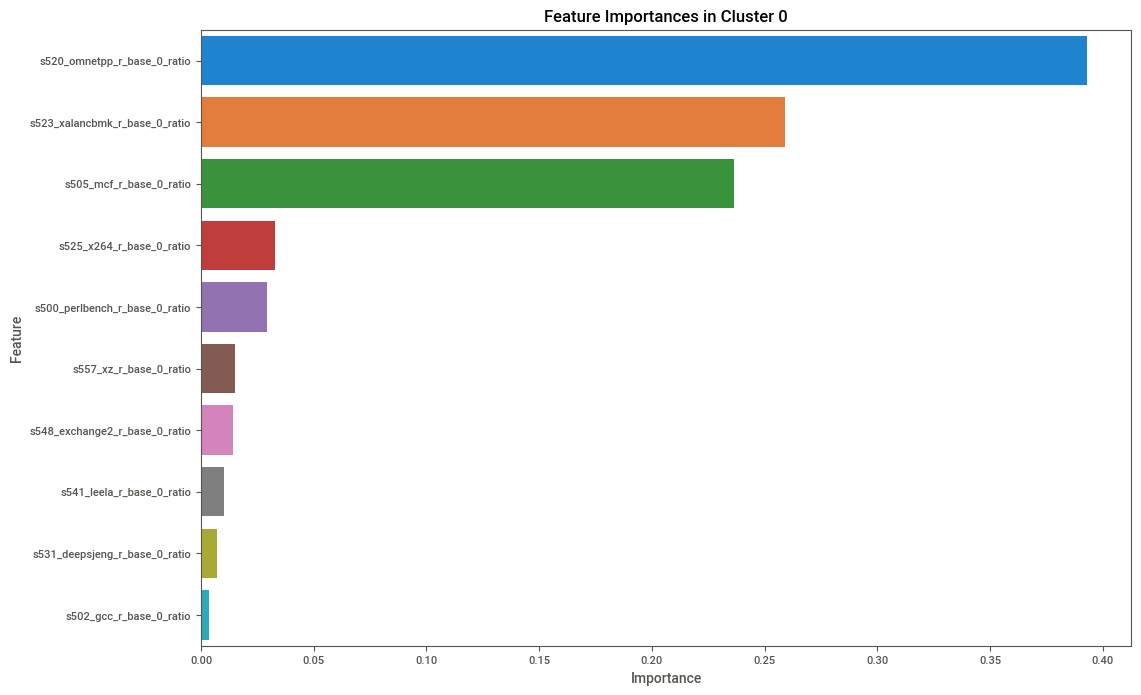

In [102]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'cluster_data' with cluster assignments and features
# Also, 'cluster' column represents the cluster assignments

# Extract data for the specified cluster
cluster_number = 0  # Change this to the desired cluster number
cluster_features = df.filter(regex=r'^s5.*ratio$|basemean')
#cluster_features = [col for col in df_cleaned.columns if col.startswith('s5') and col.endswith('ratio')]
# Assuming RandomForestRegressor for feature importance
# You can replace it with the model you used
cluster_features
rf_model = RandomForestRegressor(random_state=42)
X_train = cluster_features.drop(['basemean'], axis=1)  # Remove the target column
y_train = cluster_features['basemean']

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title(f'Feature Importances in Cluster {cluster_number}')
plt.show()


In [118]:
# Extract the top N important features
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Filter the cluster data to include only the top features
cluster_features_top = cluster_features[top_features]

# Calculate the mean or median values for each of the top features within the cluster
recommended_values = cluster_features_top.mean()  # You can use .median() if you prefer median values

print("Recommended Values:")
print(recommended_values)


Recommended Values:
s520_omnetpp_r_base_0_ratio       595.117634
s523_xalancbmk_r_base_0_ratio    1278.650927
s505_mcf_r_base_0_ratio          1628.762309
s525_x264_r_base_0_ratio         2793.545613
s500_perlbench_r_base_0_ratio     914.663068
dtype: float64


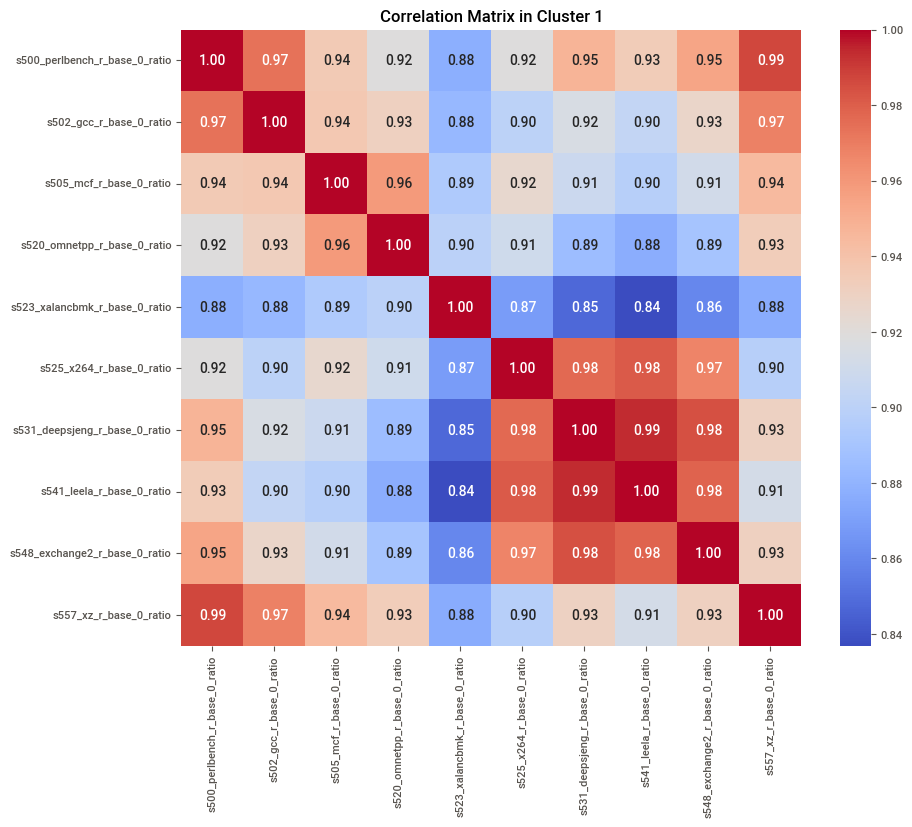

In [120]:

# Correlation matrix
correlation_matrix = single_cluster_data[test_columns].corr()
correlation_matrix
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Correlation Matrix in Cluster {cluster_number}')
plt.show()


In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'target_column' is the name of your target column
single_cluster_data['basemean'] = df_cleaned['basemean']

# Calculate the correlation matrix
correlation_matrix = single_cluster_data[test_columns].corr()
correlation_matrix
# # Sort the correlation matrix by the correlation with the target column
sorted_corr_matrix = correlation_matrix.loc['basemean', :].sort_values(ascending=False)
sorted_corr_matrix
# # Plot the sorted correlation matrix using Seaborn heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(single_cluster_data[sorted_corr_matrix.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix with Target Column')

# # # Display the sorted correlation values
# st.write("Sorted Correlation with Target Column:")
# st.write(sorted_corr_matrix)

# # Display the heatmap using Streamlit
# st.pyplot()


basemean                         1.000000
s523_xalancbmk_r_base_0_ratio    0.915458
s505_mcf_r_base_0_ratio          0.827373
s500_perlbench_r_base_0_ratio    0.818196
s557_xz_r_base_0_ratio           0.816032
s502_gcc_r_base_0_ratio          0.813954
s548_exchange2_r_base_0_ratio    0.806700
s531_deepsjeng_r_base_0_ratio    0.801457
s520_omnetpp_r_base_0_ratio      0.799517
s525_x264_r_base_0_ratio         0.796976
s541_leela_r_base_0_ratio        0.792993
Name: basemean, dtype: float64